# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [ ]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [ ]:
# Load the dataset

df = pd.read_csv('/content/Employee_data.csv')

In [ ]:
# Check the first few entries

df.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

In [ ]:
# Inspect the shape of the dataset

df.shape

(74610, 24)

In [ ]:
# Inspect the different columns in the dataset

df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [ ]:
 # Check the summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

### **1.3 Check the data type of columns**

In [ ]:
# Check the info to see the types of the feature variables and the null values present

df.dtypes
# Check for the null values**
df.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [ ]:
# Check the number of missing values in each column

df.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [ ]:
# Check the percentage of missing values in each column

(df.isnull().sum()/len(df))*100

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.562659
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.234151
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [ ]:
# Handle the missing value rows in the column
df['Distance from Home'].fillna(df['Distance from Home'].median(), inplace=True)
df['Company Tenure (In Months)'].fillna(df['Company Tenure (In Months)'].median(), inplace=True)
print("Missing values in df:\n", df.isnull().sum())

Missing values in df:
 Employee ID                   0
Age                           0
Gender                        0
Years at Company              0
Job Role                      0
Monthly Income                0
Work-Life Balance             0
Job Satisfaction              0
Performance Rating            0
Number of Promotions          0
Overtime                      0
Distance from Home            0
Education Level               0
Marital Status                0
Number of Dependents          0
Job Level                     0
Company Size                  0
Company Tenure (In Months)    0
Remote Work                   0
Leadership Opportunities      0
Innovation Opportunities      0
Company Reputation            0
Employee Recognition          0
Attrition                     0
dtype: int64


2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [ ]:
# Check the percentage of remaining data after missing values are removed

remaining_percentage = (len(df) / 74610) * 100
print(f"Percentage of remaining data: {remaining_percentage:.2f}%")

Percentage of remaining data: 100.00%


### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [ ]:
# Write a function to display the categorical columns with their unique values and check for redundant values

def check_categorical_values(df):
  """
  Displays categorical columns with their unique values and checks for redundancy.

  Args:
    df: The input pandas DataFrame.
  """
  categorical_cols = df.select_dtypes(include='object').columns

  print("Categorical Columns and Unique Values:")
  for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"- {col}: {unique_values}")
    # Optional: Add a check for potentially redundant values based on specific patterns
    # For example, checking for variations in capitalization, extra spaces, etc.
    # You might need to customize this check based on your data's characteristics.
    # Example: check for lowercase versions
    if len(unique_values) != len(df[col].str.lower().unique()):
      print(f"  Potential redundancy found in '{col}' (case variations).")
    # Example: check for leading/trailing whitespace
    if len(unique_values) != len(df[col].str.strip().unique()):
       print(f"  Potential redundancy found in '{col}' (whitespace).")

check_categorical_values(df)


Categorical Columns and Unique Values:
- Gender: ['Male' 'Female']
- Job Role: ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
- Work-Life Balance: ['Excellent' 'Poor' 'Good' 'Fair']
- Job Satisfaction: ['Medium' 'High' 'Very High' 'Low']
- Performance Rating: ['Average' 'Low' 'High' 'Below Average']
- Overtime: ['No' 'Yes']
- Education Level: ['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']
- Marital Status: ['Married' 'Divorced' 'Single']
- Job Level: ['Mid' 'Senior' 'Entry']
- Company Size: ['Medium' 'Small' 'Large']
- Remote Work: ['No' 'Yes']
- Leadership Opportunities: ['No' 'Yes']
- Innovation Opportunities: ['No' 'Yes']
- Company Reputation: ['Excellent' 'Fair' 'Poor' 'Good']
- Employee Recognition: ['Medium' 'Low' 'High' 'Very High']
- Attrition: ['Stayed' 'Left']


In [ ]:
# Check the data

df.head()
df.shape
df.columns
df.info()
df.dtypes
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          74610 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

Employee ID                   0
Age                           0
Gender                        0
Years at Company              0
Job Role                      0
Monthly Income                0
Work-Life Balance             0
Job Satisfaction              0
Performance Rating            0
Number of Promotions          0
Overtime                      0
Distance from Home            0
Education Level               0
Marital Status                0
Number of Dependents          0
Job Level                     0
Company Size                  0
Company Tenure (In Months)    0
Remote Work                   0
Leadership Opportunities      0
Innovation Opportunities      0
Company Reputation            0
Employee Recognition          0
Attrition                     0
dtype: int64

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [ ]:
# Drop redundant columns which are not required for modelling

# Dropping the 'Employee ID' column as it's a unique identifier and not useful for modeling
df.drop('Employee ID', axis=1, inplace=True)

# Print the shape of the dataframe to confirm the column has been dropped
df.shape

(74610, 23)

In [ ]:
# Check first few rows of data

df.head()

Age  Gender  Years at Company    Job Role  Monthly Income  \
0   31    Male                19   Education            5390   
1   59  Female                 4       Media            5534   
2   24  Female                10  Healthcare            8159   
3   36  Female                 7   Education            3989   
4   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

  Overtime  ...  Number of Dependents Job Level Company Size  \
0       No  ...                     0       Mid       Medium   
1       No  ...                     3       Mid       Medium   
2       No  ...                     3       Mid       Medium   
3       No  ...                     2       Mid        Small   
4      Yes  ...                     0    Senior       Medium   

   Company Tenure (In Months) Remote Work Leadership Opportunities  \
0                        89.0          No                       No   
1                        21.0          No                       No   
2                        74.0          No                       No   
3                        50.0         Yes                       No   
4                        68.0          No                       No   

   Innovation Opportunities Company Reputation Employee Recognition Attrition  
0                        No          Excellent               Medium    Stayed  
1                        No               Fair                  Low    Stayed  
2                        No               Poor                  Low    Stayed  
3                        No               Good               Medium    Stayed  
4                        No               Fair               Medium    Stayed  

[5 rows x 23 columns]

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [ ]:
# Import Train Test Split

from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [ ]:
# Put all the feature variables in X
# Put the target variable in y

# Encode target variable
y = df['Attrition'].map({'Stayed': 1, 'Left': 0})  # Binary encoding
print("y unique values:", y.unique())
print("y NaNs:", y.isnull().sum())

# Split data
X = df.drop('Attrition', axis=1)


y unique values: [1 0]
y NaNs: 0


### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [ ]:
# Split the data into 70% train data and 30% validation data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

# Debug y_val
print("y_val type:", type(y_val))
print("y_val head:\n", y_val.head())
print("y_val unique values:", y_val.unique())
print("y_val NaNs:", y_val.isnull().sum())

Training set shape: (52227, 22) (52227,)
Validation set shape: (22383, 22) (22383,)
y_val type: <class 'pandas.core.series.Series'>
y_val head:
 61298    0
46813    1
37033    0
41834    1
25905    1
Name: Attrition, dtype: int64
y_val unique values: [0 1]
y_val NaNs: 0


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [ ]:
# Select numerical columns
numerical_cols_train = X_train.select_dtypes(include=np.number).columns
print("Numerical columns in training data:")
numerical_cols_train

Numerical columns in training data:


Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)'],
      dtype='object')

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

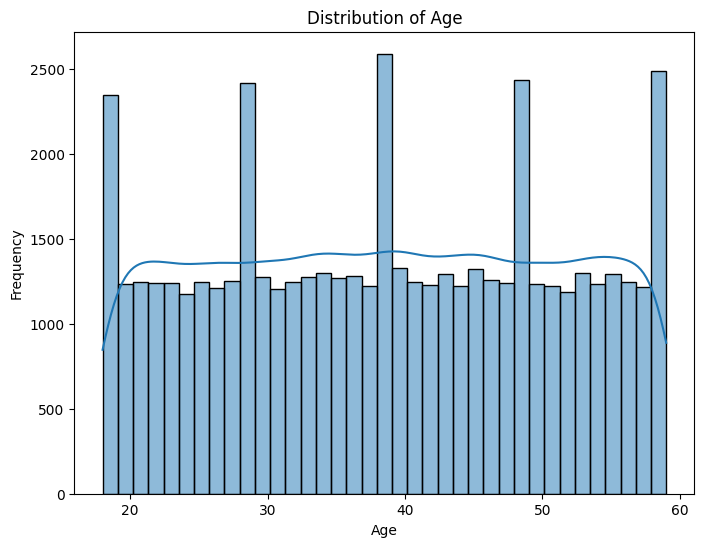

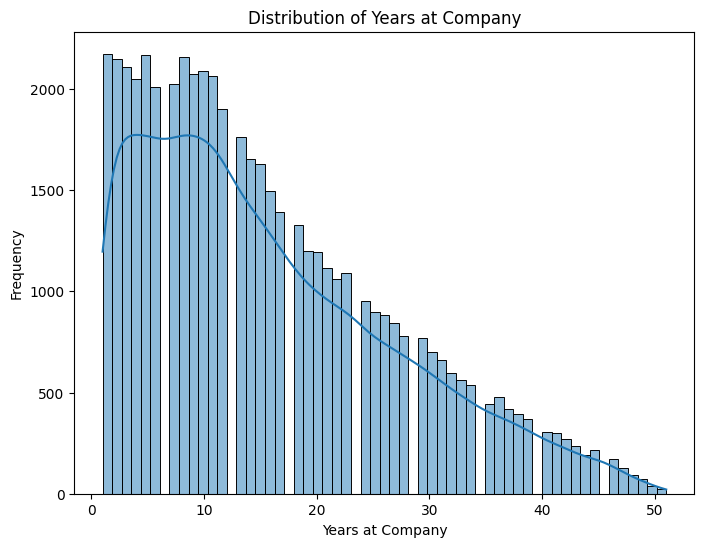

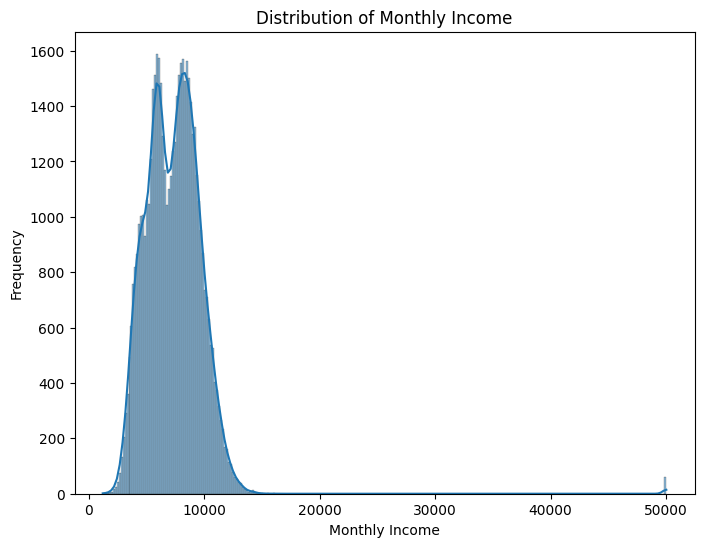

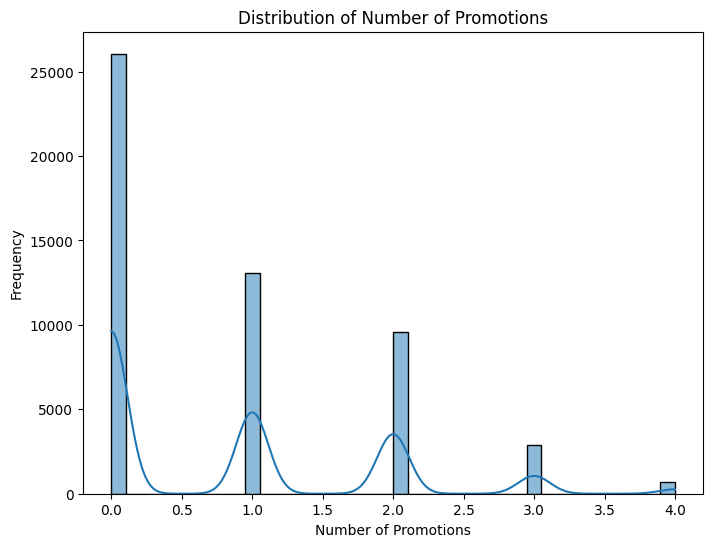

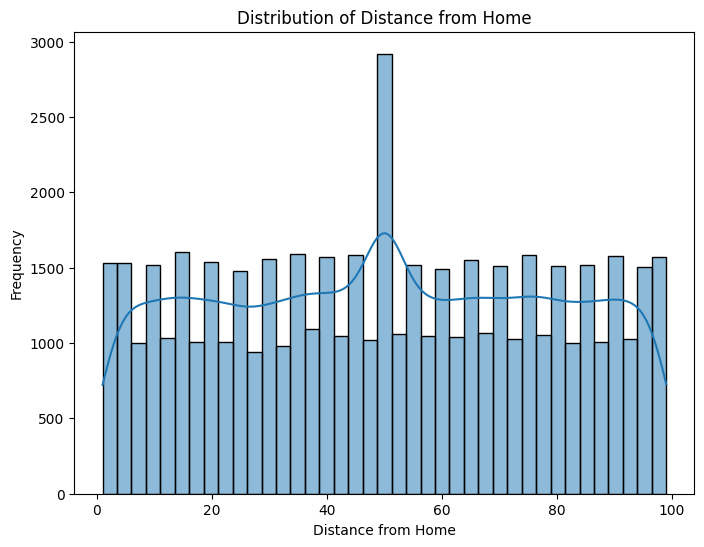

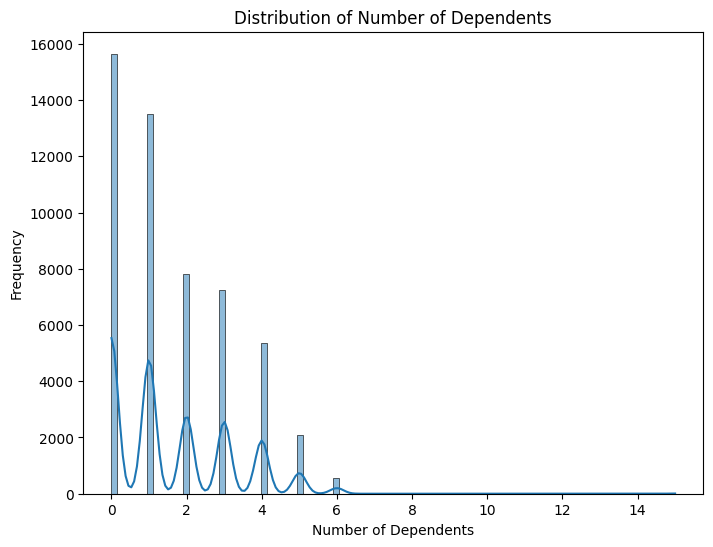

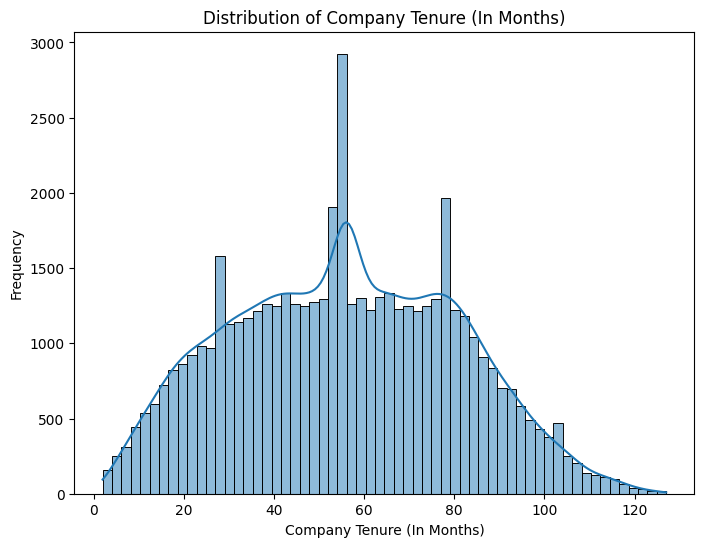

In [ ]:
# Plot all the numerical columns to understand their distribution
# # Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting distribution of numerical columns
for col in numerical_cols_train:
  plt.figure(figsize=(8, 6))
  sns.histplot(X_train[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

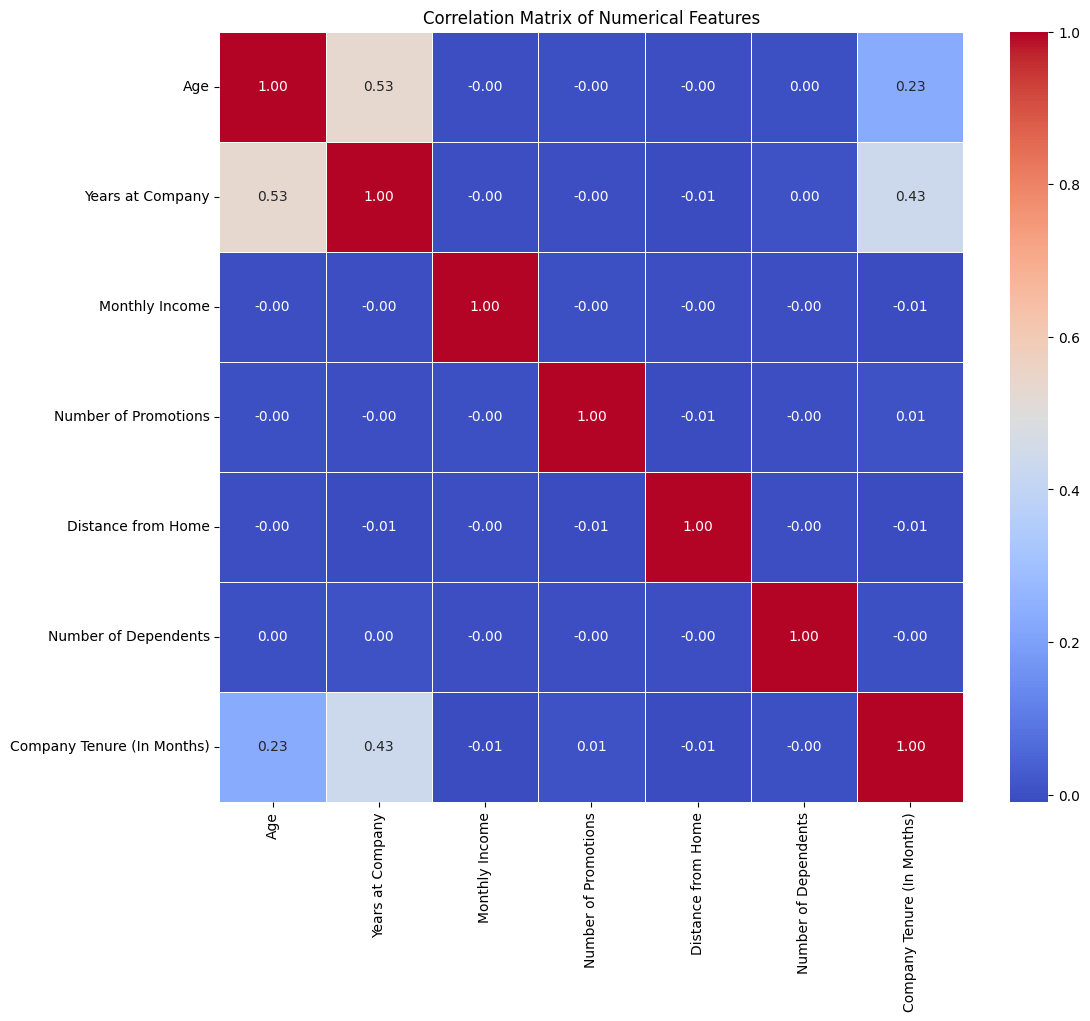

In [ ]:
# Create correlation matrix for numerical columns
# # Plot Heatmap of the correlation matrix

import matplotlib.pyplot as plt
correlation_matrix = X_train[numerical_cols_train].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

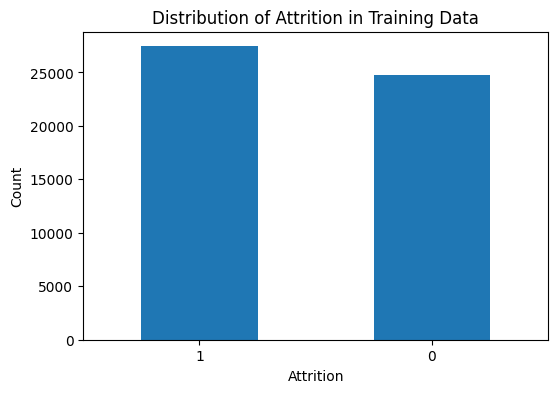

In [ ]:
# Plot a bar chart to check class balance

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
y_train.value_counts().plot(kind='bar')
plt.title('Distribution of Attrition in Training Data')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

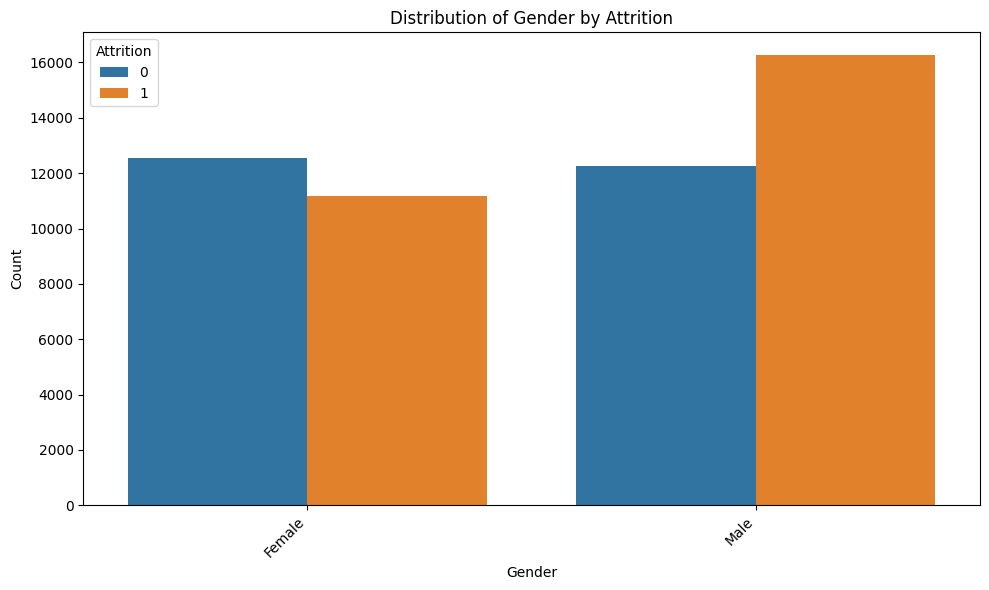

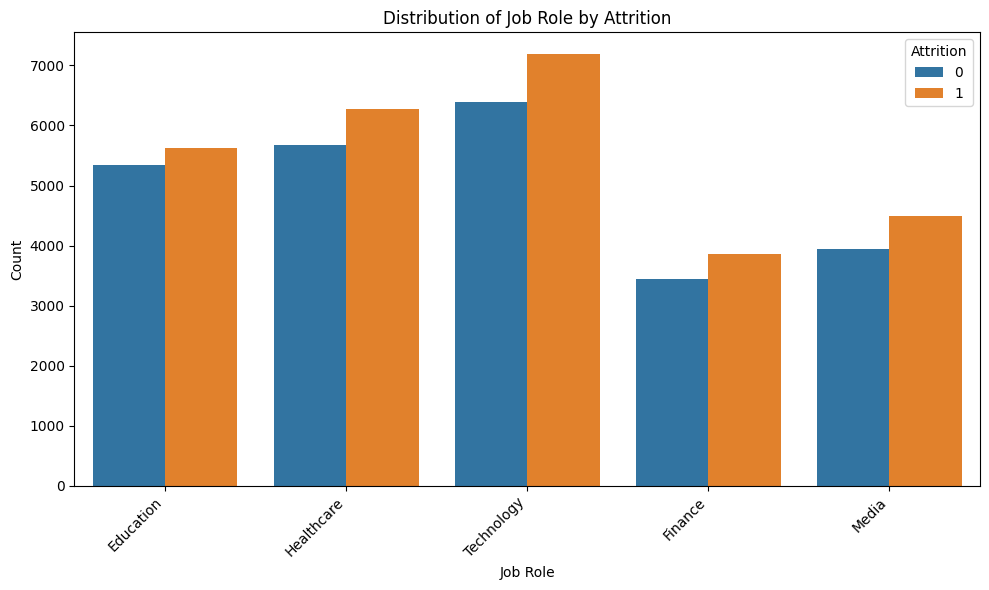

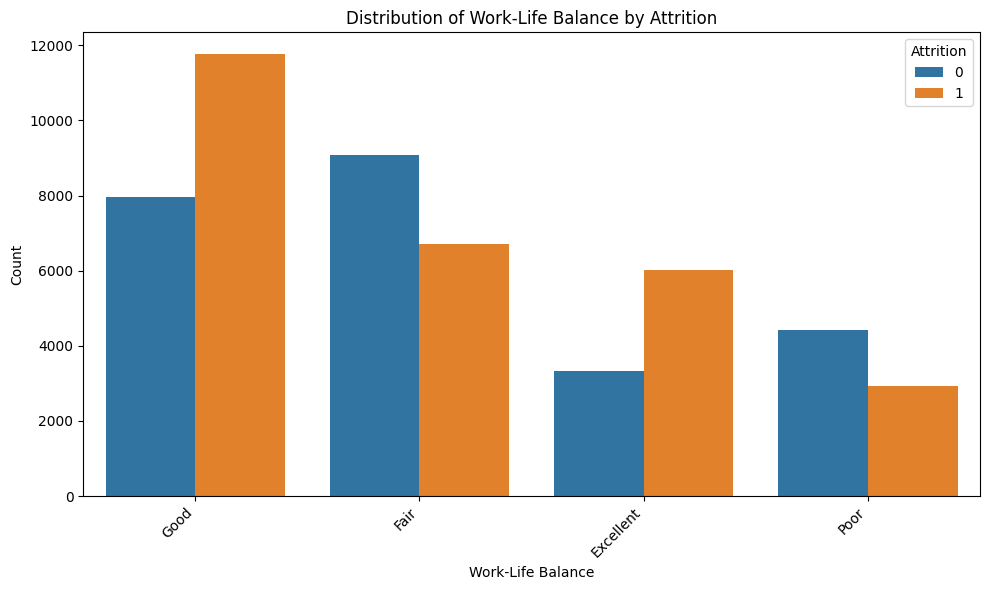

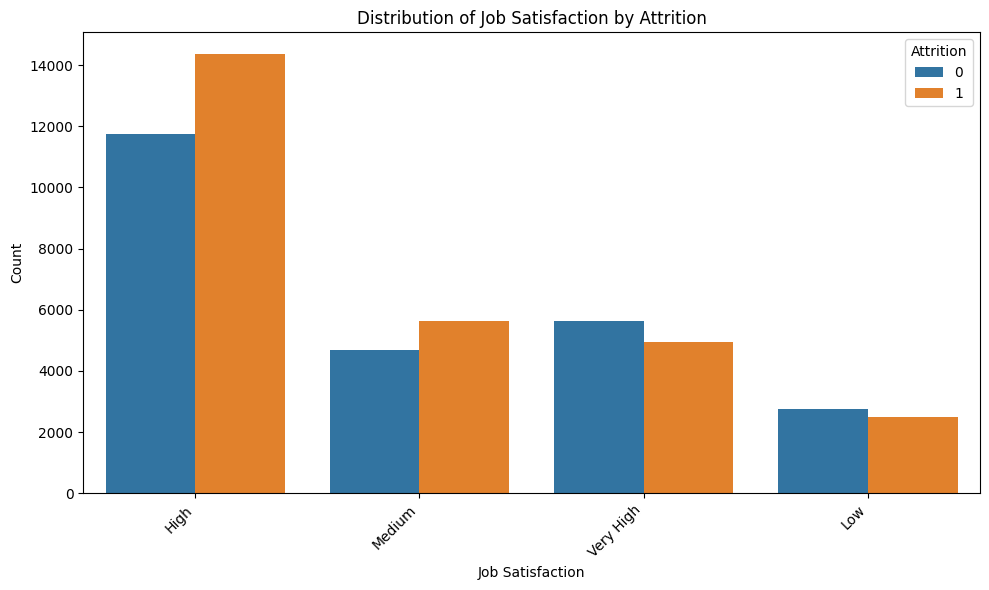

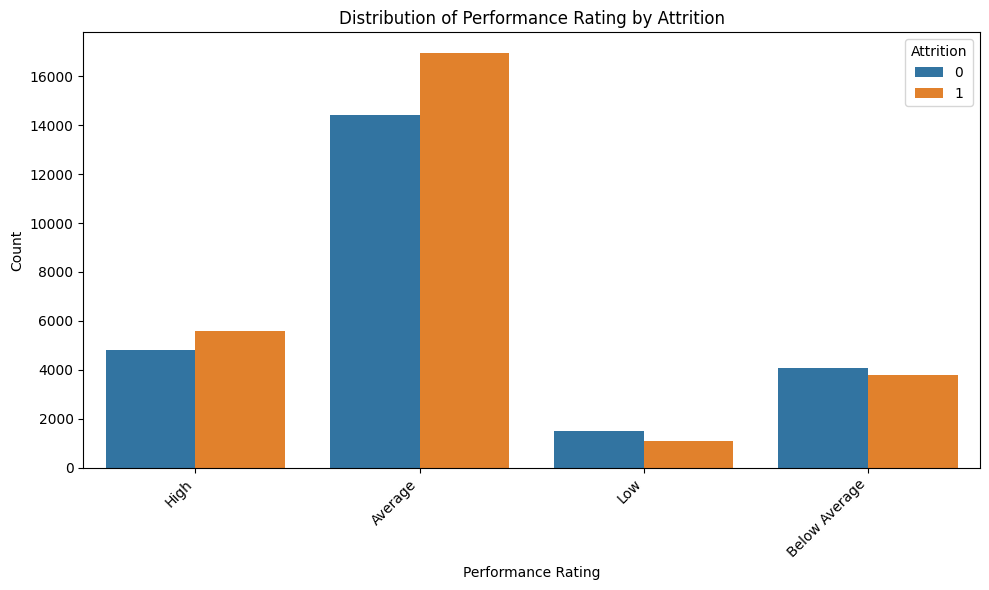

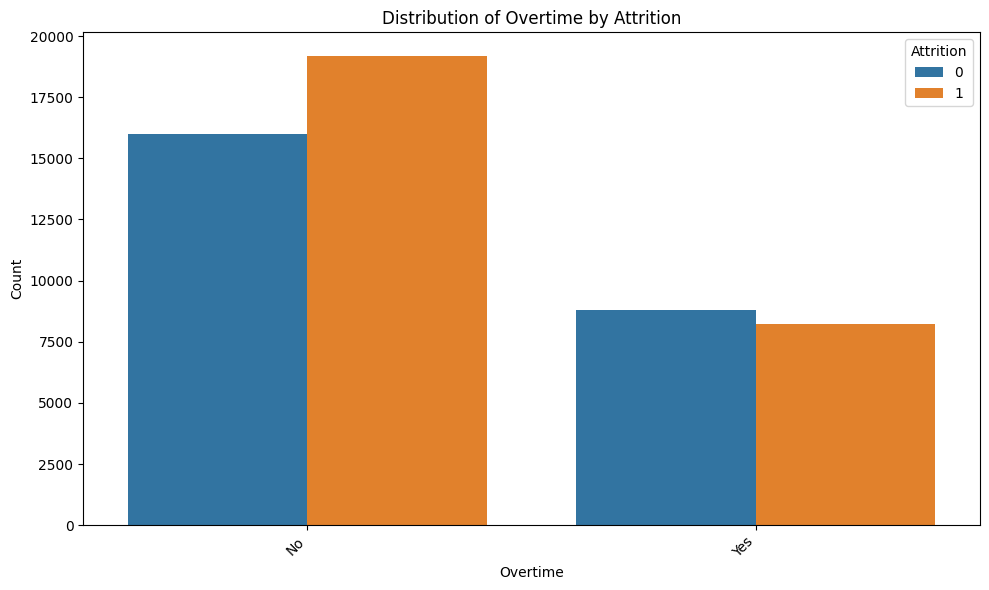

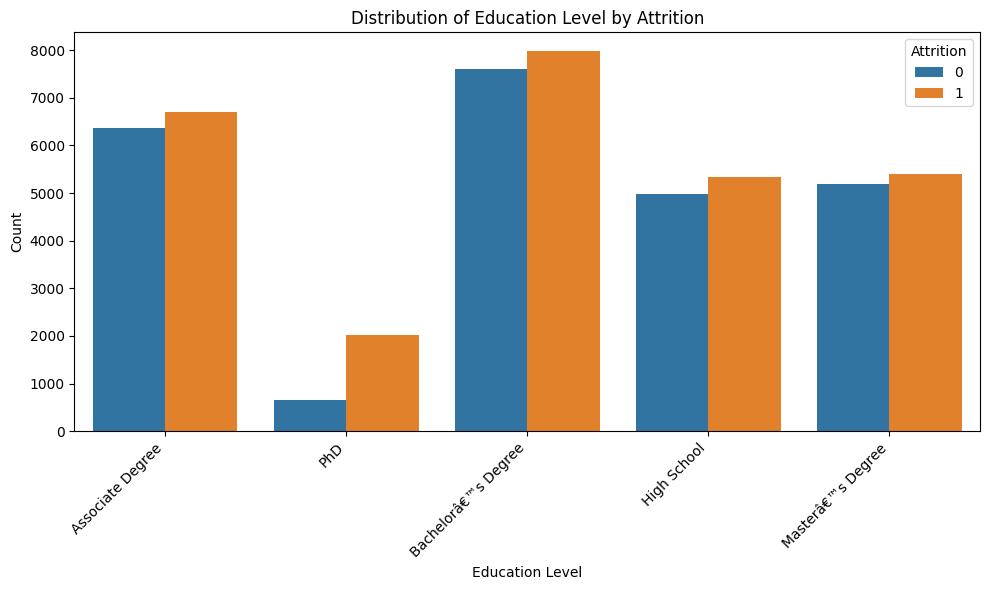

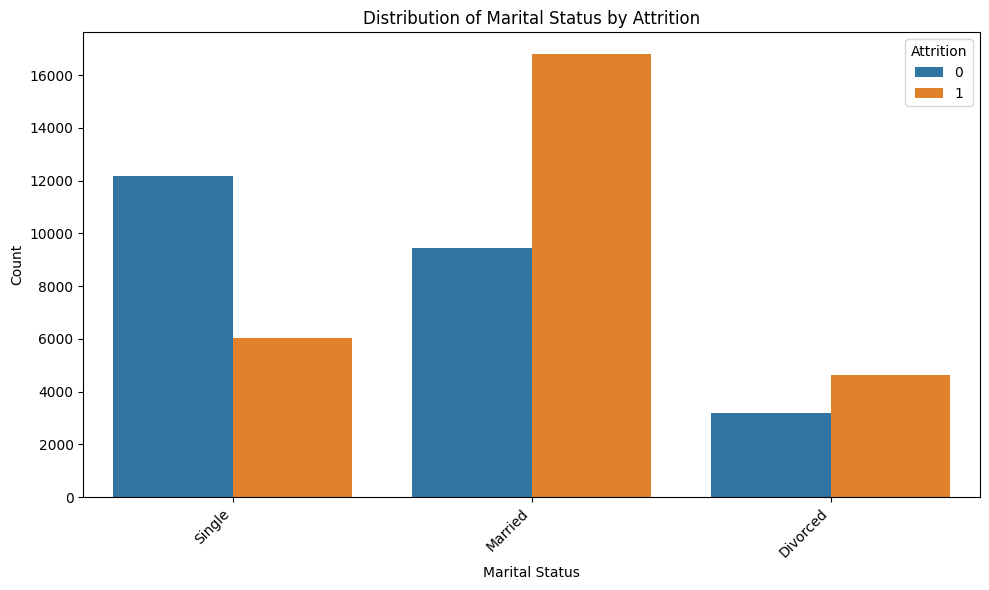

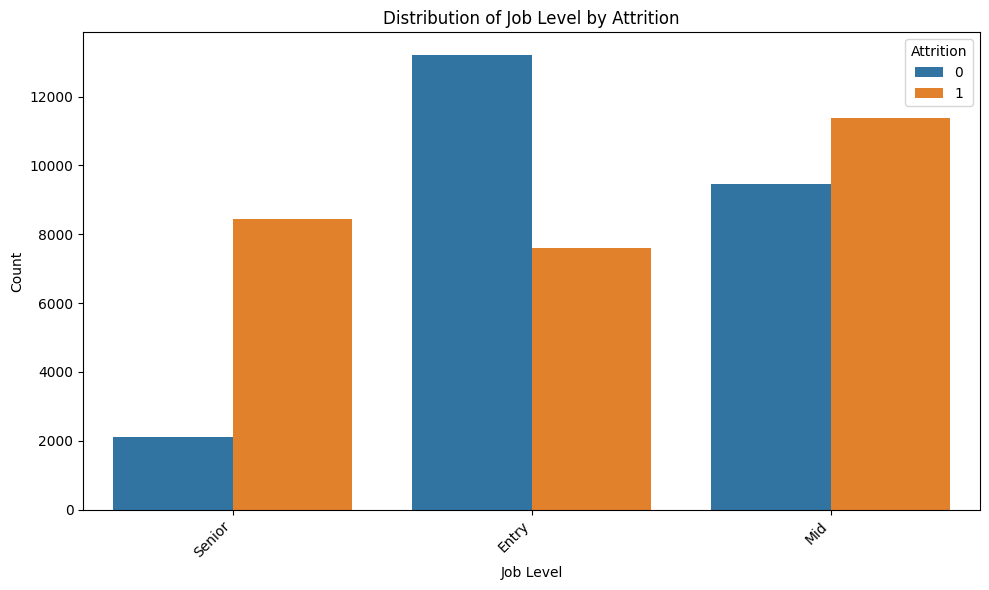

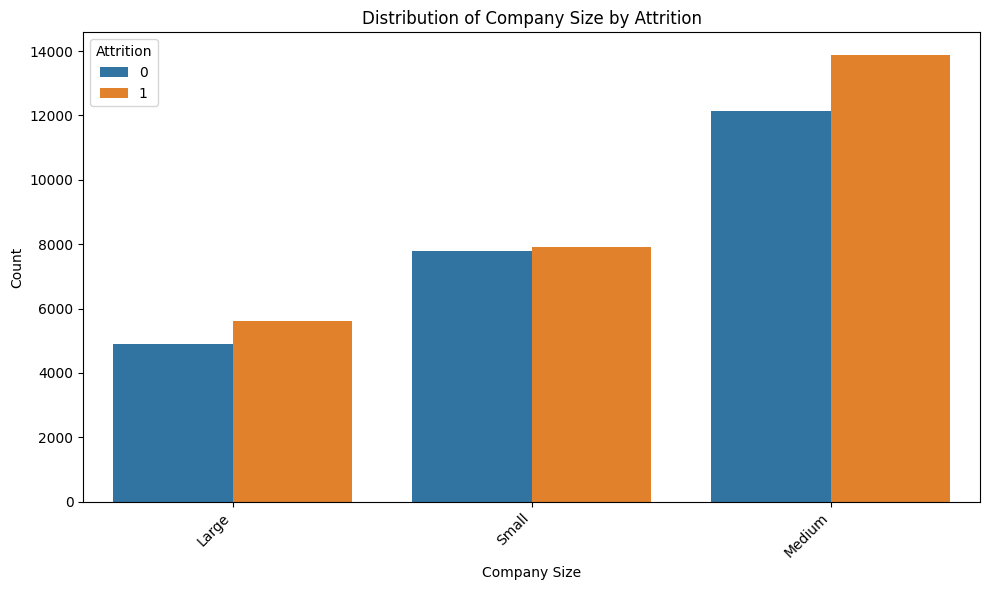

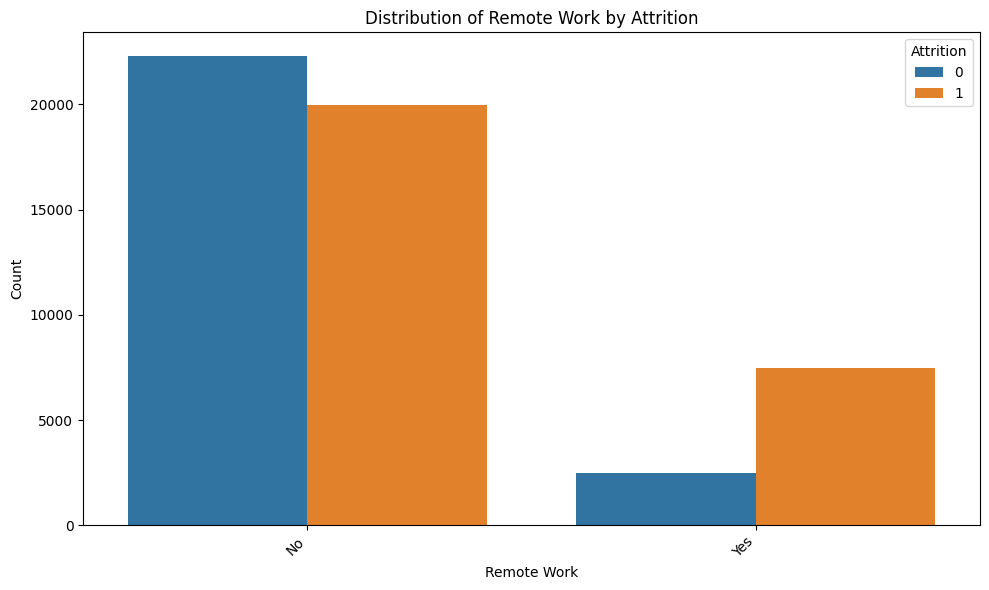

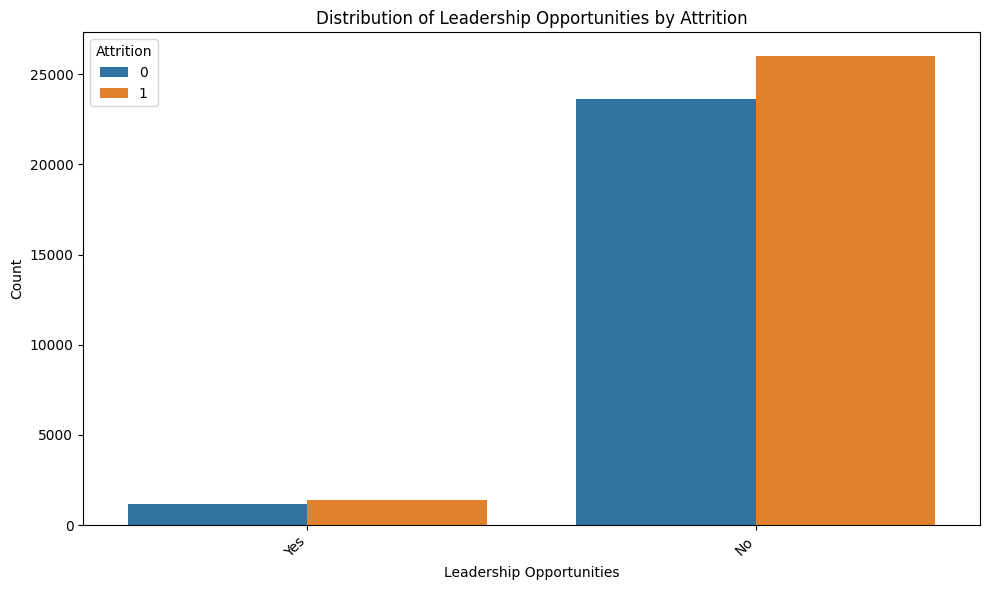

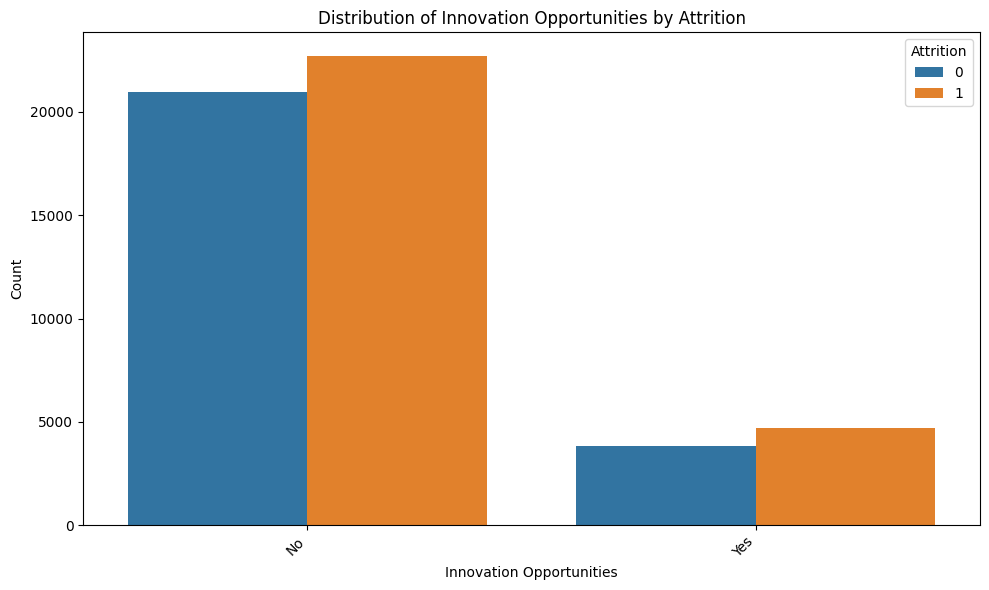

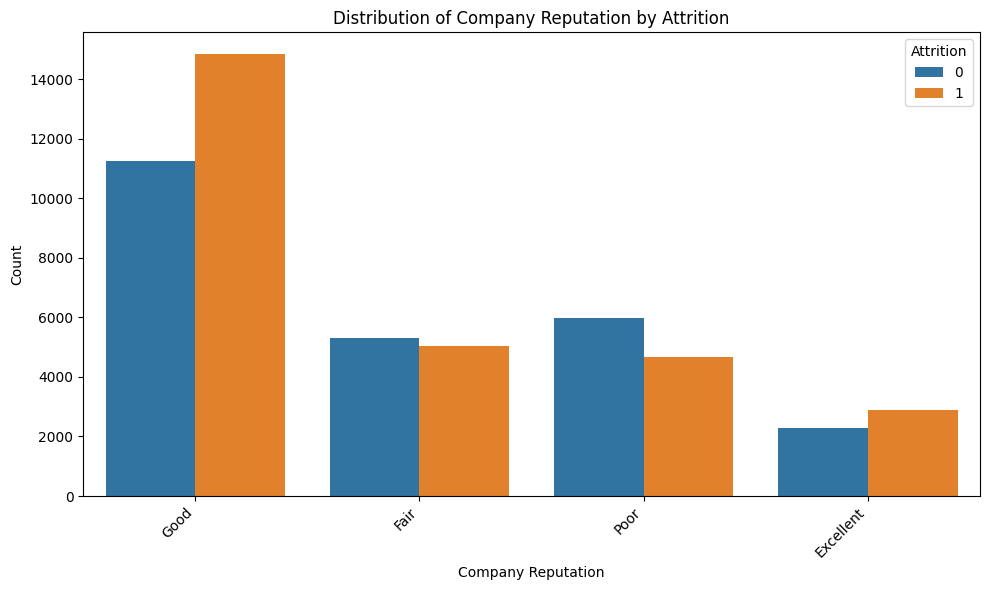

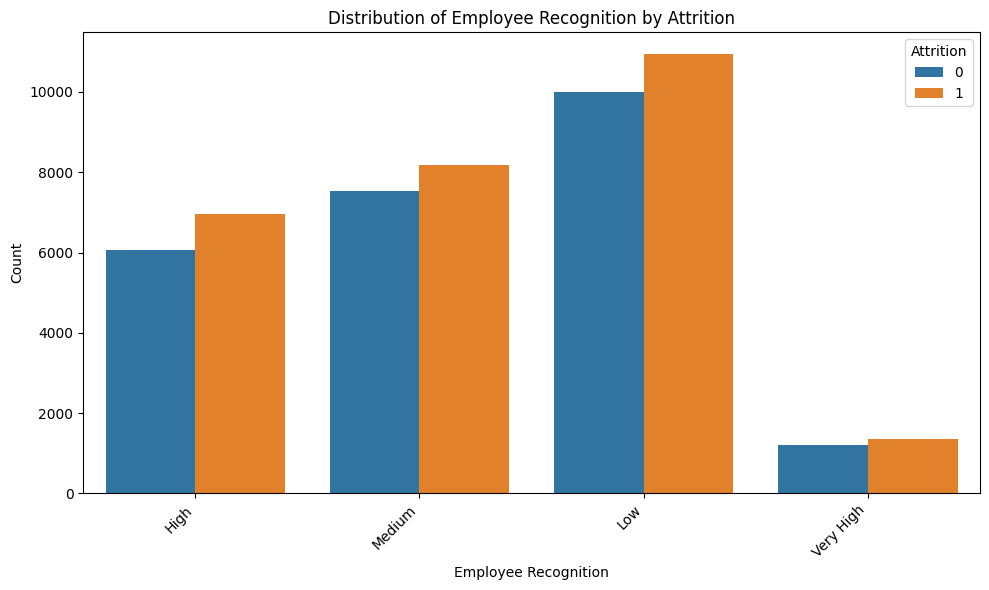

In [ ]:
# Plot distribution for each categorical column with target variable

import pandas as pd
import matplotlib.pyplot as plt
# Select categorical columns from training data
categorical_cols_train = X_train.select_dtypes(include='object').columns

# Plot distribution for each categorical column with target variable
for col in categorical_cols_train:
  plt.figure(figsize=(10, 6))
  sns.countplot(data=pd.concat([X_train, y_train], axis=1), x=col, hue='Attrition')
  plt.title(f'Distribution of {col} by Attrition')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [ ]:
# Select numerical columns

import numpy as np
numerical_cols_val = X_val.select_dtypes(include=np.number).columns
print("Numerical columns in validation data:")
numerical_cols_val

Numerical columns in validation data:


Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)'],
      dtype='object')

5.1.2 Plot distribution of numerical columns

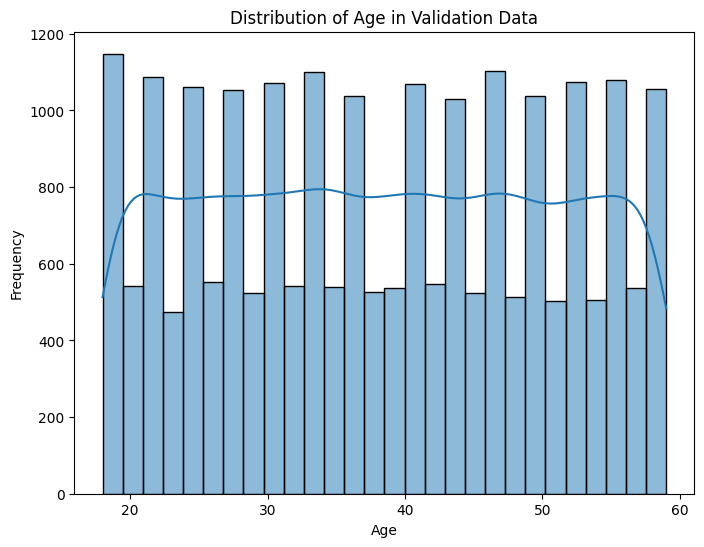

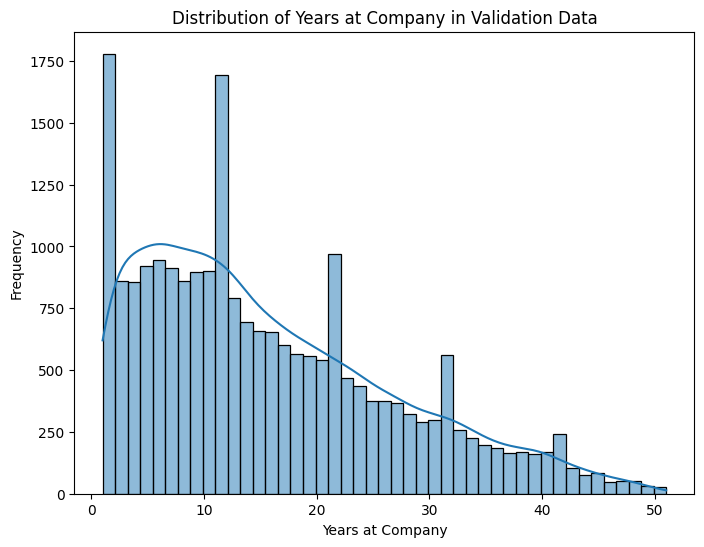

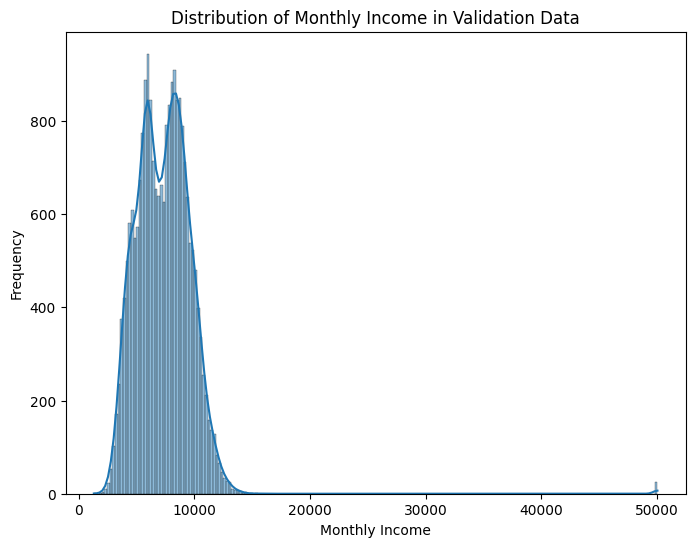

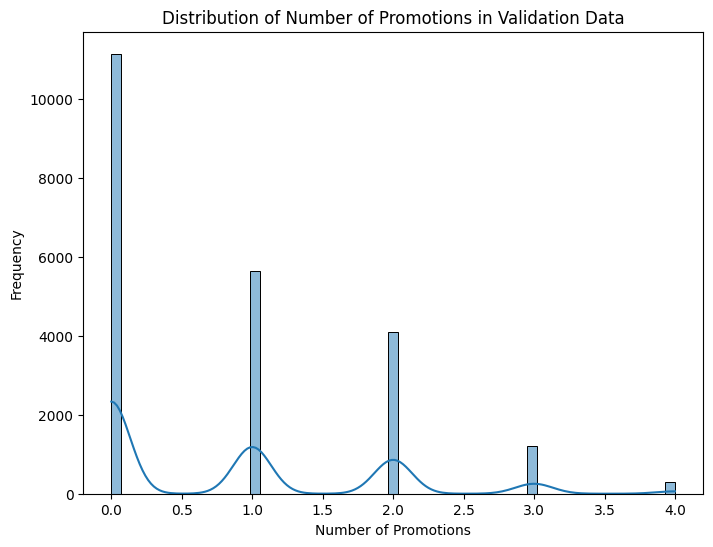

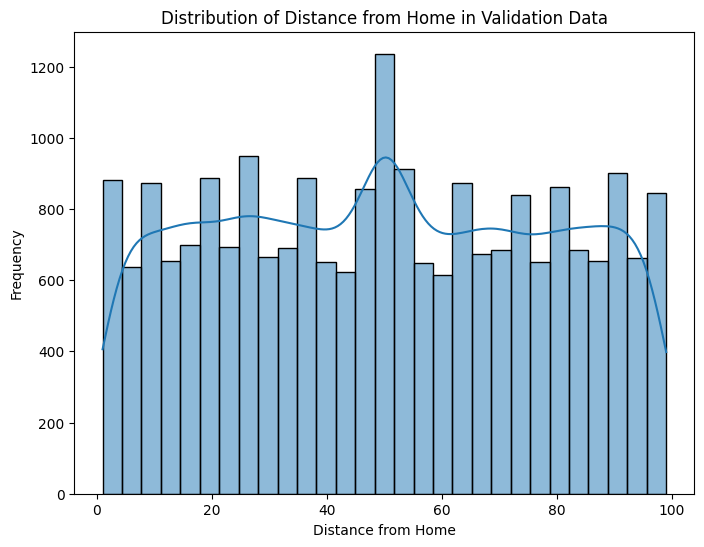

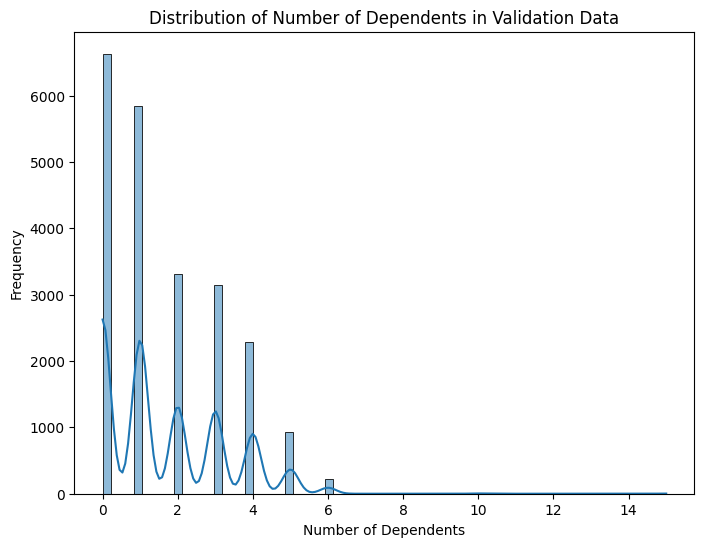

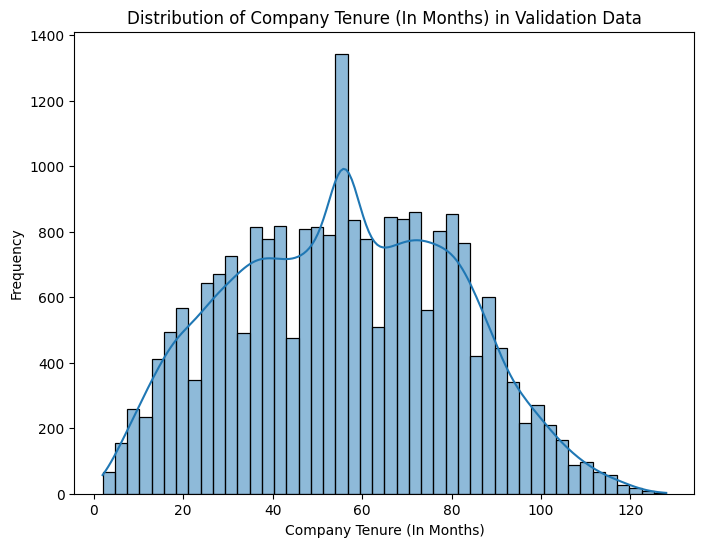

In [ ]:
# Plot all the numerical columns to understand their distribution

import matplotlib.pyplot as plt
# Plotting distribution of numerical columns
for col in numerical_cols_val:
  plt.figure(figsize=(8, 6))
  sns.histplot(X_val[col], kde=True)
  plt.title(f'Distribution of {col} in Validation Data')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

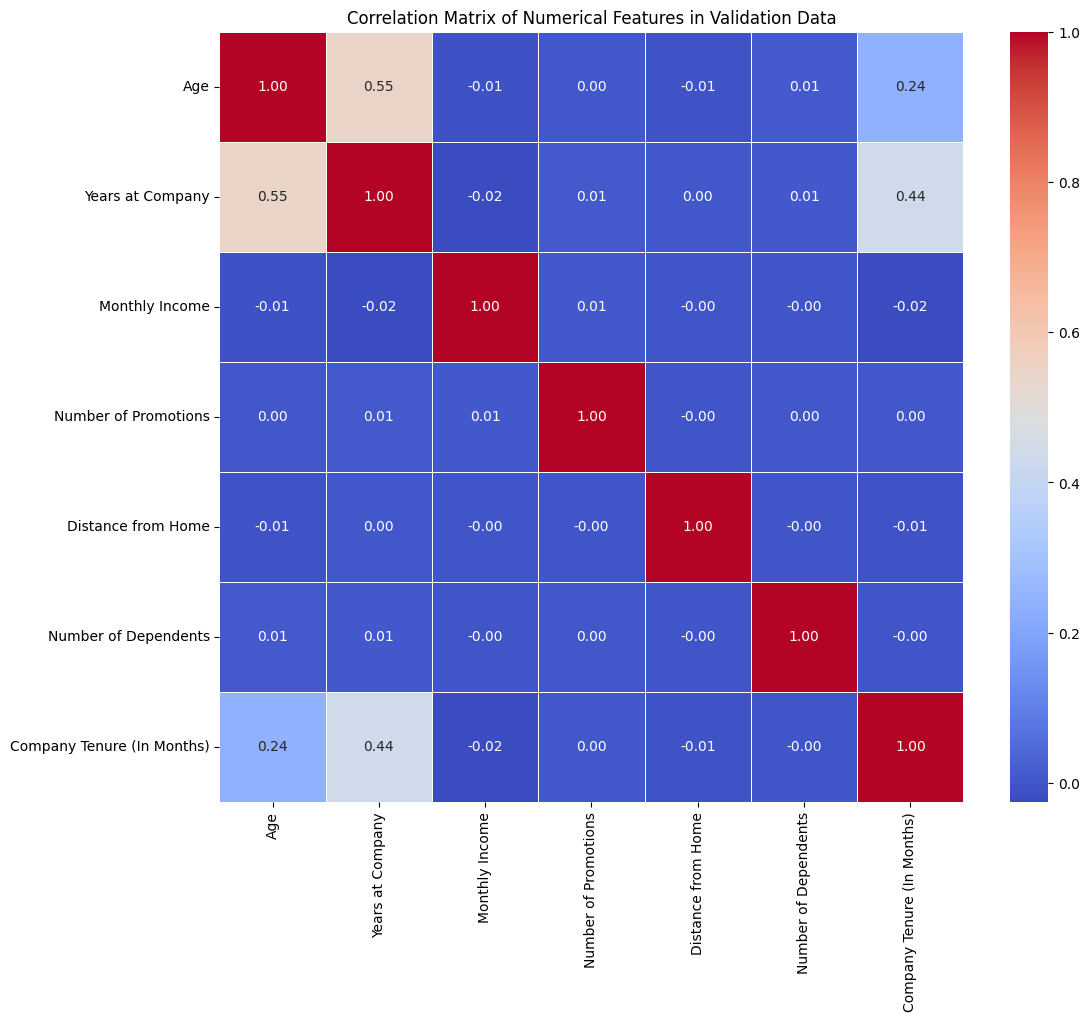

In [ ]:
# Create correlation matrix for numerical columns
# # Plot Heatmap of the correlation matrix

import matplotlib.pyplot as plt
correlation_matrix = X_val[numerical_cols_val].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features in Validation Data')
plt.show()

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

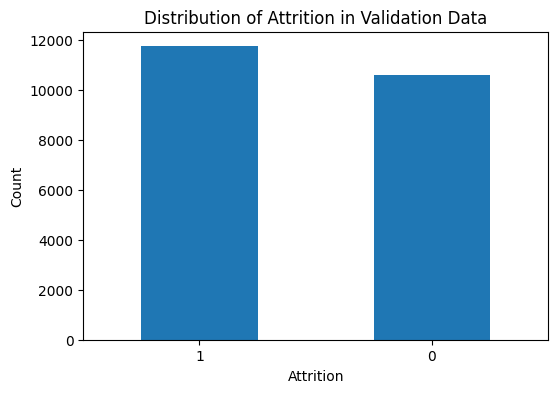

In [ ]:
# Plot a bar chart to check class balance

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
y_val.value_counts().plot(kind='bar')
plt.title('Distribution of Attrition in Validation Data')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

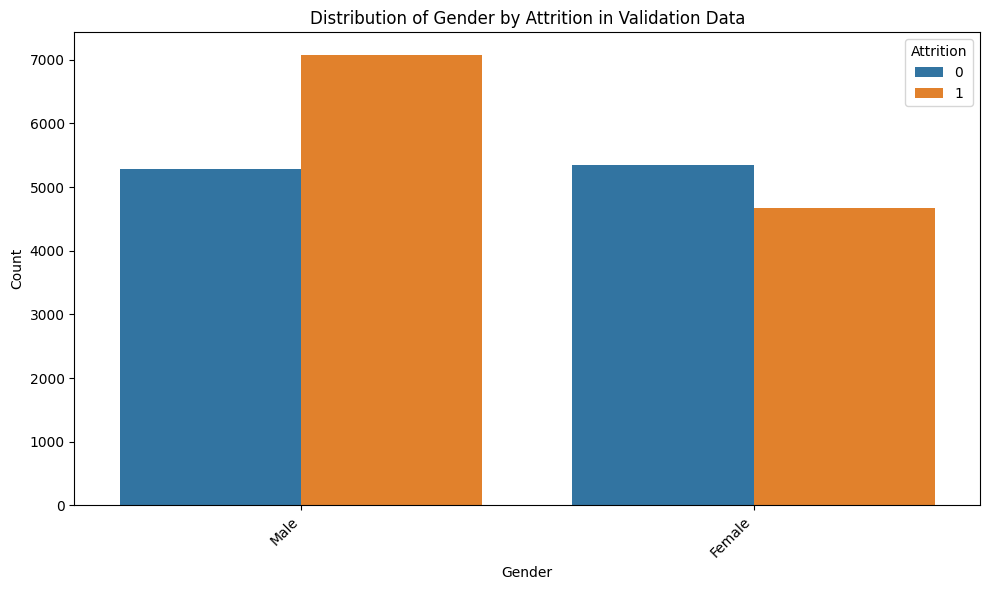

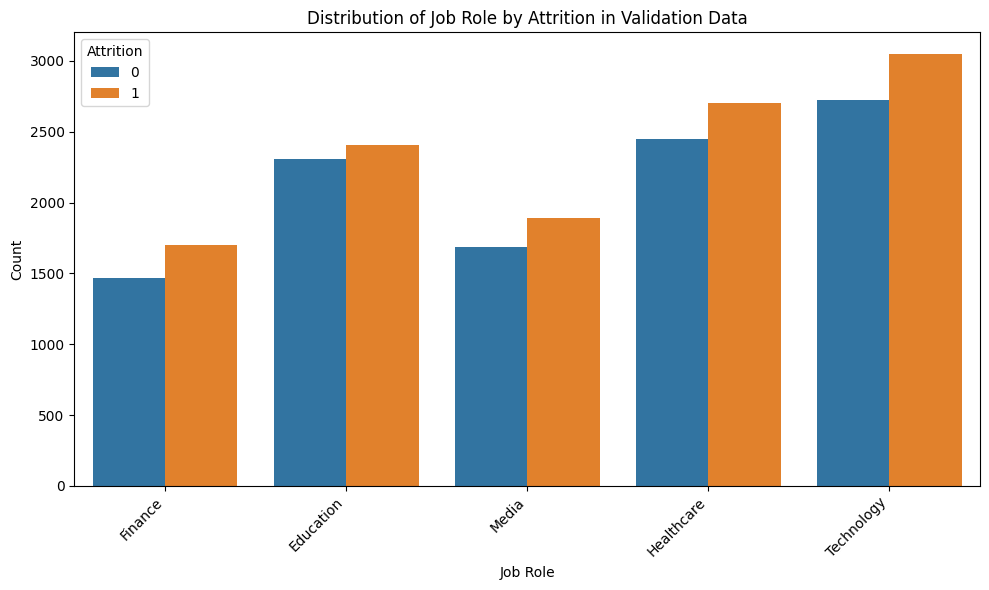

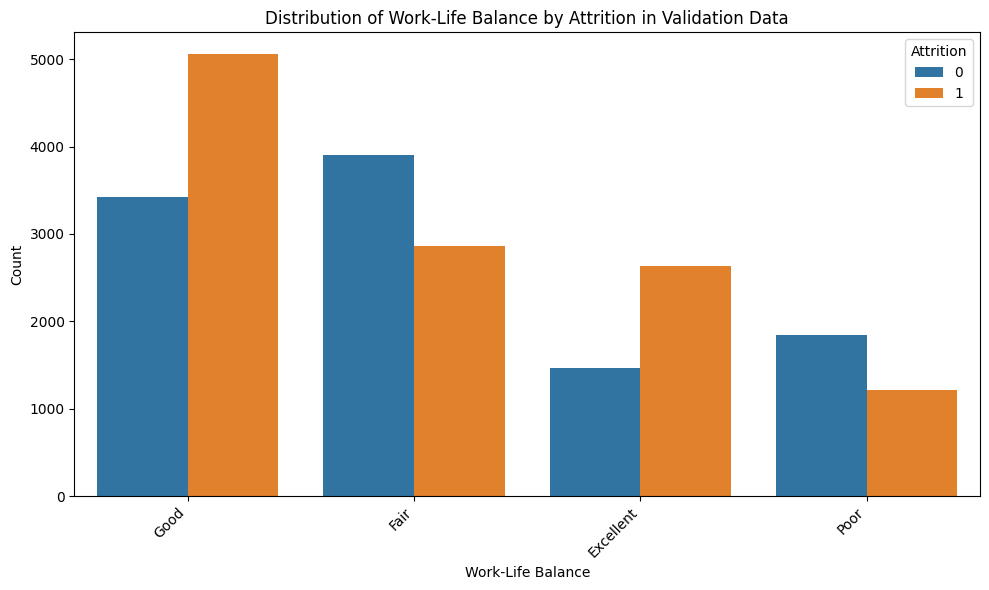

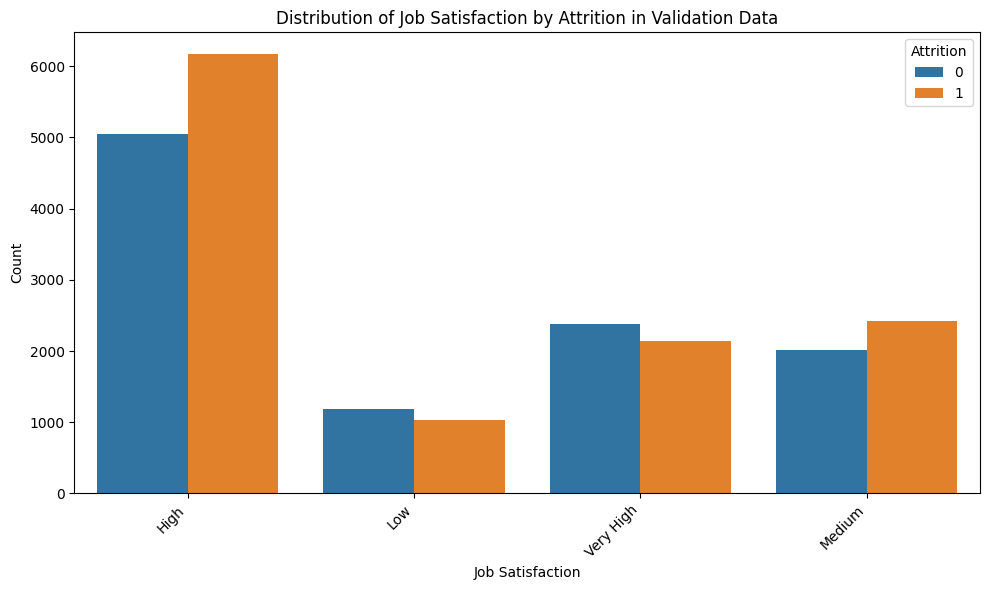

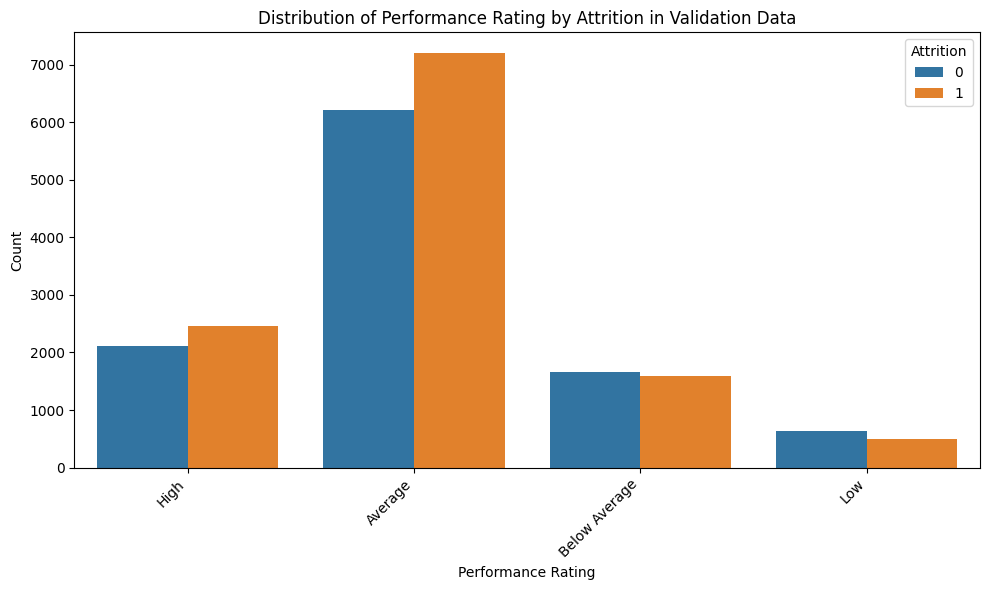

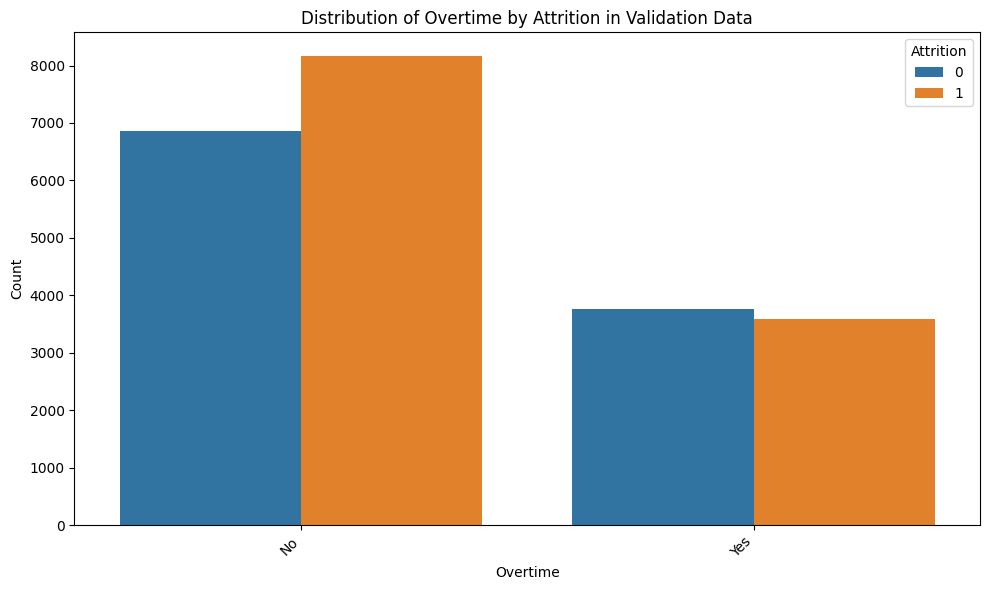

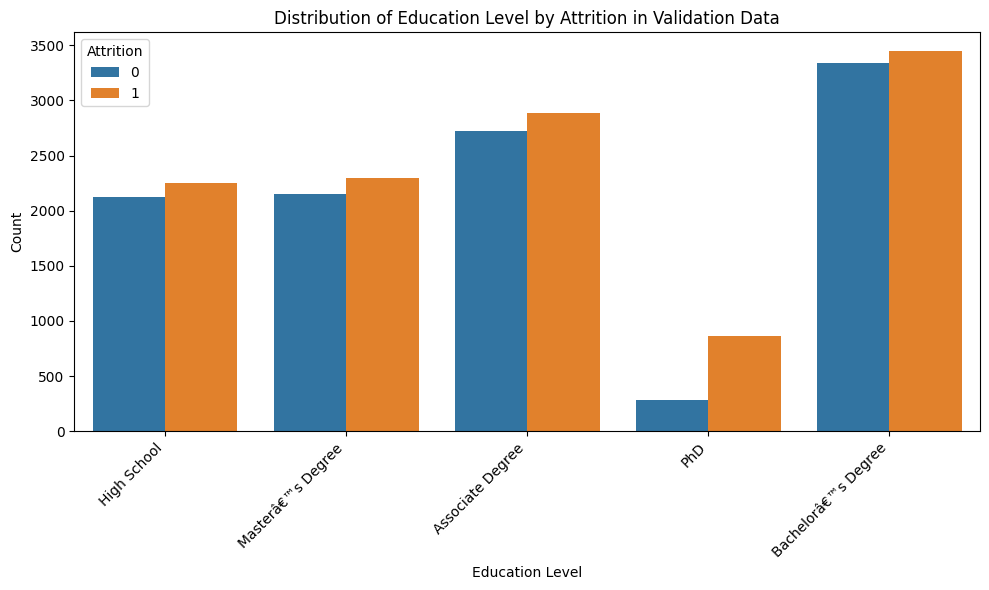

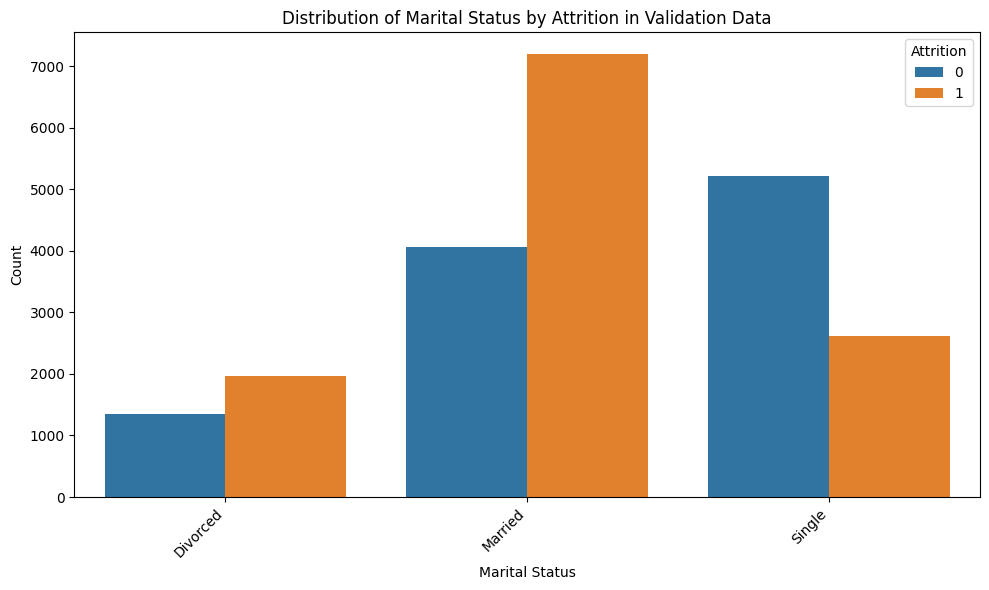

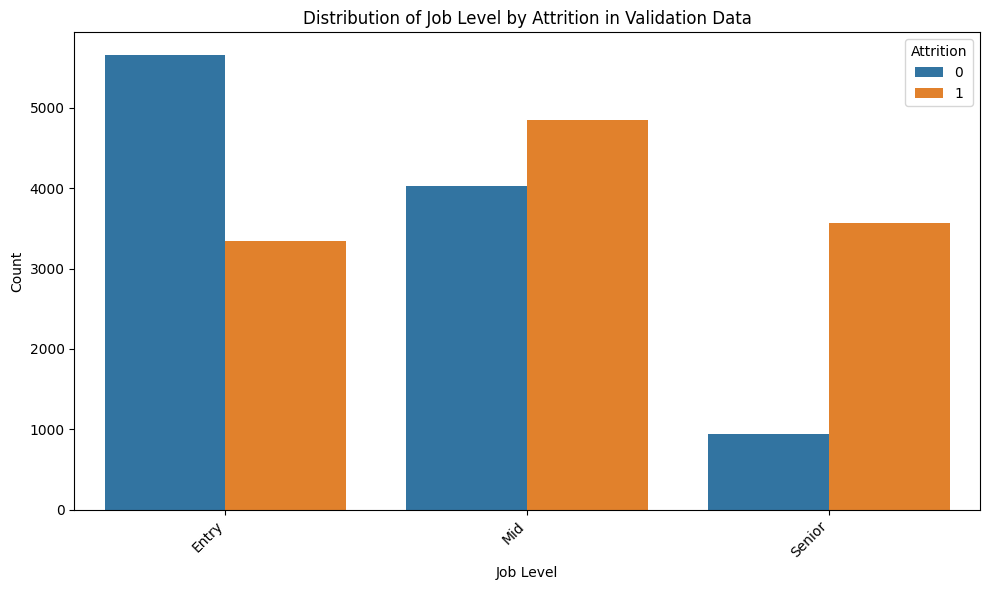

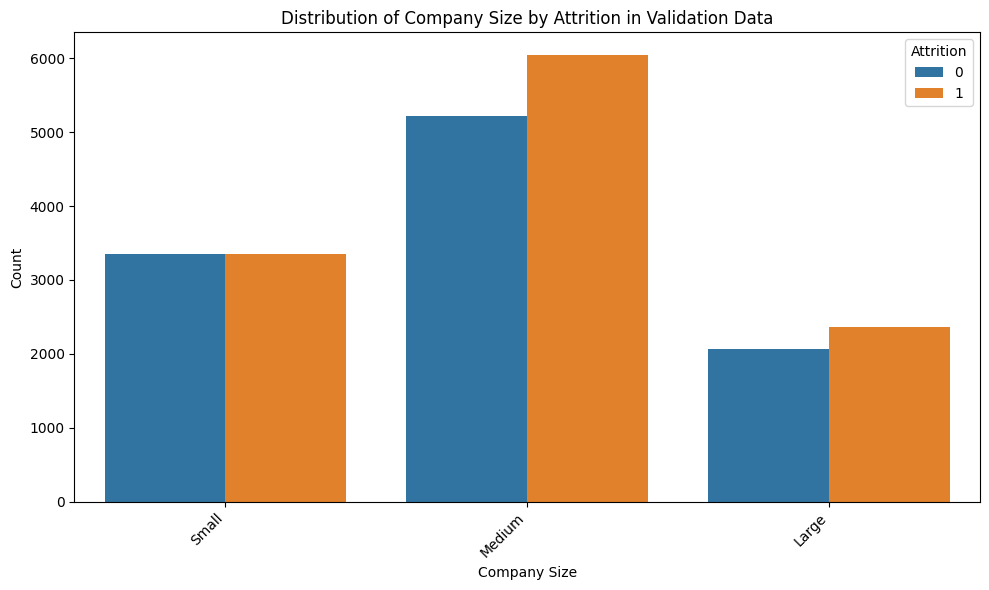

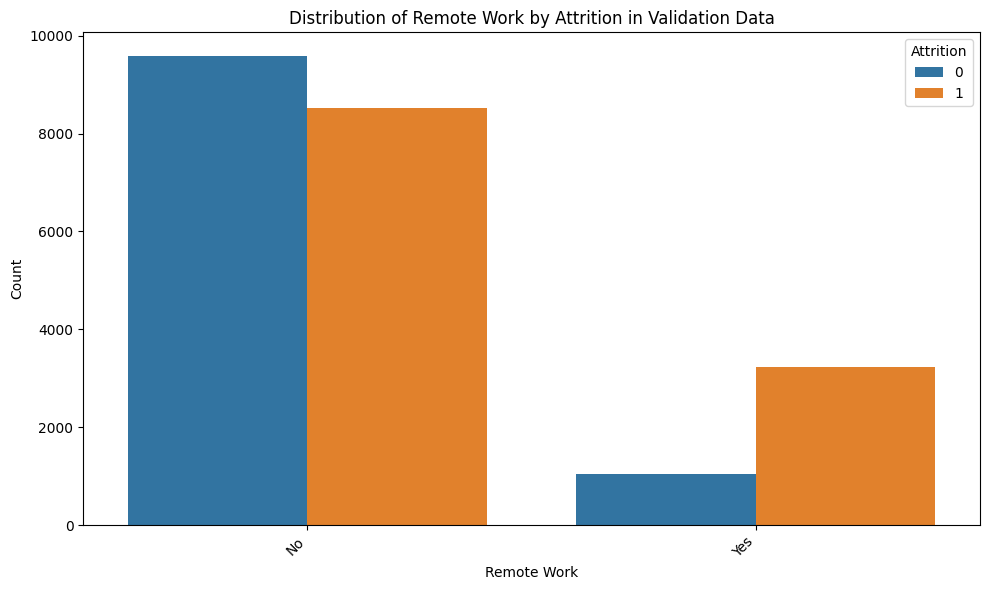

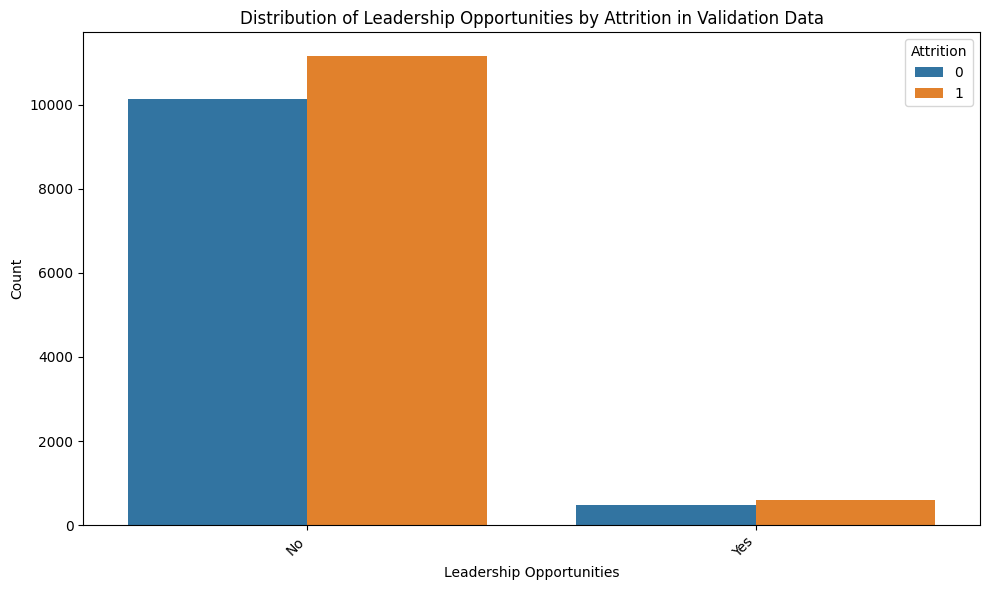

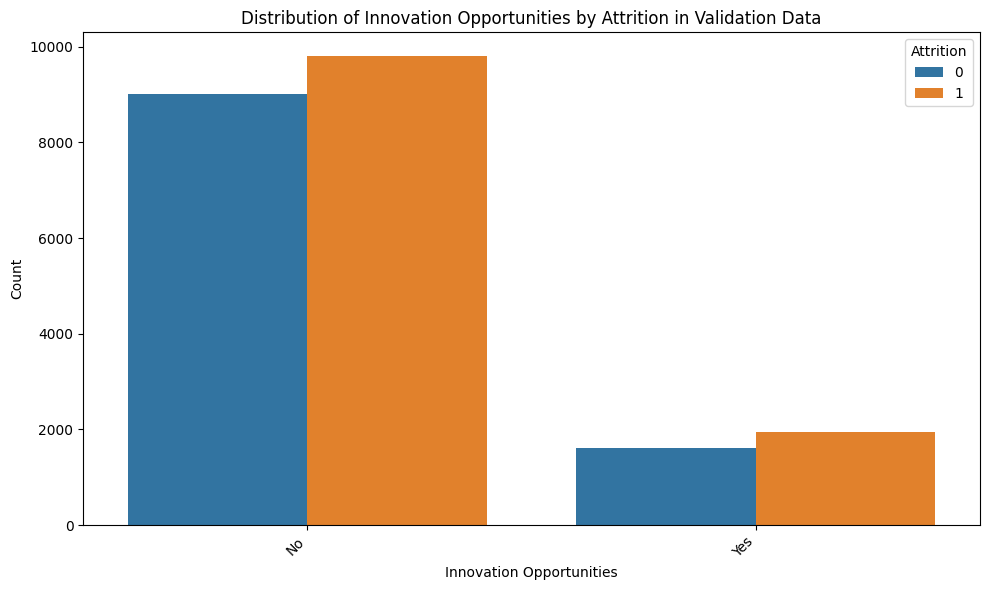

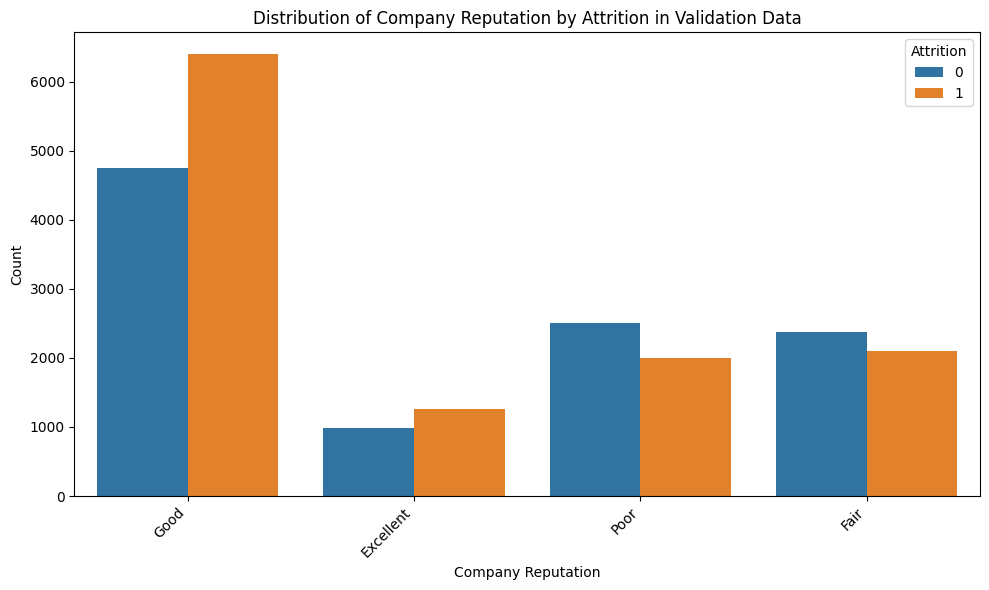

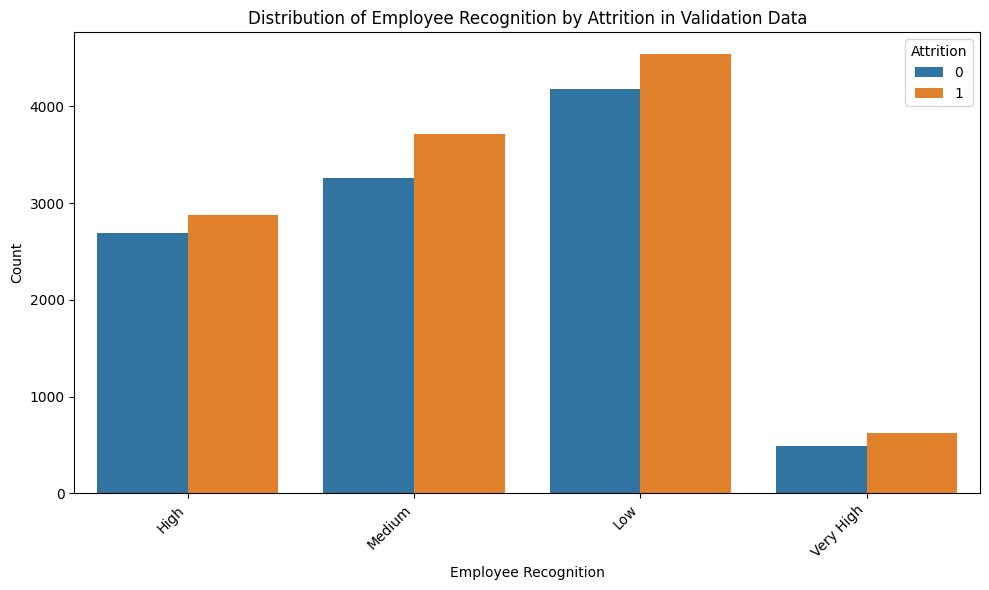

In [ ]:
# Plot distribution for each categorical column with target variable

import pandas as pd
import matplotlib.pyplot as plt
# Select categorical columns from validation data
categorical_cols_val = X_val.select_dtypes(include='object').columns

# Plot distribution for each categorical column with target variable
for col in categorical_cols_val:
  plt.figure(figsize=(10, 6))
  sns.countplot(data=pd.concat([X_val, y_val], axis=1), x=col, hue='Attrition')
  plt.title(f'Distribution of {col} by Attrition in Validation Data')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [ ]:
# Check the categorical columns

categorical_cols_for_dummy = X_train.select_dtypes(include='object').columns
print("Categorical columns for which dummy variables will be created:")
categorical_cols_for_dummy

Categorical columns for which dummy variables will be created:


Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'],
      dtype='object')

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [ ]:
# Create dummy variables using the 'get_dummies' for independent columns
# # Add the results to the master DataFrame

import pandas as pd
X_train = pd.get_dummies(X_train, columns=categorical_cols_for_dummy, drop_first=True)

# Print the shape of the training data after creating dummy variables
print("Shape of X_train after creating dummy variables:", X_train.shape)

# Display the first few rows of the modified training data
X_train.head()

Shape of X_train after creating dummy variables: (52227, 41)


Age  Years at Company  Monthly Income  Number of Promotions  \
20940   25                 1            4207                     2   
17495   26                13            9601                     0   
28404   35                19            5415                     0   
70914   21                 9            8258                     0   
56430   53                24            6015                     1   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
20940                 6.0                     5                        78.0   
17495                14.0                     0                        83.0   
28404                10.0                     3                        48.0   
70914                50.0                     5                        16.0   
56430                13.0                     0                        79.0   

       Gender_Male  Job Role_Finance  Job Role_Healthcare  ...  \
20940        False             False                False  ...   
17495         True             False                 True  ...   
28404        False             False                False  ...   
70914         True             False                 True  ...   
56430         True             False                False  ...   

       Company Size_Small  Remote Work_Yes  Leadership Opportunities_Yes  \
20940               False            False                          True   
17495                True            False                          True   
28404               False            False                         False   
70914                True            False                         False   
56430                True            False                          True   

       Innovation Opportunities_Yes  Company Reputation_Fair  \
20940                         False                    False   
17495                         False                    False   
28404                         False                    False   
70914                         False                    False   
56430                         False                    False   

       Company Reputation_Good  Company Reputation_Poor  \
20940                     True                    False   
17495                     True                    False   
28404                     True                    False   
70914                     True                    False   
56430                     True                    False   

       Employee Recognition_Low  Employee Recognition_Medium  \
20940                     False                        False   
17495                     False                         True   
28404                     False                         True   
70914                     False                        False   
56430                     False                        False   

       Employee Recognition_Very High  
20940                           False  
17495                           False  
28404                           False  
70914                           False  
56430                           False  

[5 rows x 41 columns]

Now, drop the original categorical columns and check the DataFrame

In [ ]:
# Drop the original categorical columns and check the DataFrame

import pandas as pd
# This step was implicitly done by `pd.get_dummies` with `drop_first=True`.
# The original categorical columns are replaced by the new dummy variables.
# We can verify this by checking the column types or list of columns again.

# Check the data types to see if the original object columns are gone
X_train.dtypes

# Check the columns again
X_train.columns

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)', 'Gender_Male', 'Job Role_Finance',
       'Job Role_Healthcare', 'Job Role_Media', 'Job Role_Technology',
       'Work-Life Balance_Fair', 'Work-Life Balance_Good',
       'Work-Life Balance_Poor', 'Job Satisfaction_Low',
       'Job Satisfaction_Medium', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_High',
       'Performance Rating_Low', 'Overtime_Yes',
       'Education Level_Bachelorâ€™s Degree', 'Education Level_High School',
       'Education Level_Masterâ€™s Degree', 'Education Level_PhD',
       'Marital Status_Married', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Company Size_Medium', 'Company Size_Small',
       'Remote Work_Yes', 'Leadership Opportunities_Yes',
       'Innovation Opportunities_Yes', 'Company Reputation_Fair',
       'Compan

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [ ]:
# Create dummy variables using the 'get_dummies' for independent columns
# # Add the results to the master DataFrame

import pandas as pd
X_val = pd.get_dummies(X_val, columns=categorical_cols_for_dummy, drop_first=True)

# Print the shape of the validation data after creating dummy variables
print("Shape of X_val after creating dummy variables:", X_val.shape)

# Display the first few rows of the modified validation data
X_val.head()
# Now, drop the original categorical columns and check the DataFrame
# This step was implicitly done by `pd.get_dummies` with `drop_first=True`.
# The original categorical columns are replaced by the new dummy variables.
# We can verify this by checking the column types or list of columns again.
# Align columns
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
# Check the data types to see if the original object columns are gone
X_val.dtypes

# Check the columns again
X_val.columns

Shape of X_val after creating dummy variables: (22383, 41)


Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)', 'Gender_Male', 'Job Role_Finance',
       'Job Role_Healthcare', 'Job Role_Media', 'Job Role_Technology',
       'Work-Life Balance_Fair', 'Work-Life Balance_Good',
       'Work-Life Balance_Poor', 'Job Satisfaction_Low',
       'Job Satisfaction_Medium', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_High',
       'Performance Rating_Low', 'Overtime_Yes',
       'Education Level_Bachelorâ€™s Degree', 'Education Level_High School',
       'Education Level_Masterâ€™s Degree', 'Education Level_PhD',
       'Marital Status_Married', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Company Size_Medium', 'Company Size_Small',
       'Remote Work_Yes', 'Leadership Opportunities_Yes',
       'Innovation Opportunities_Yes', 'Company Reputation_Fair',
       'Compan

Now, drop the original categorical columns and check the DataFrame

In [ ]:
# Drop categorical columns and check the DataFrame

# Check the data types to see if the original object columns are gone
X_val.dtypes

# Check the columns again
X_val.columns

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)', 'Gender_Male', 'Job Role_Finance',
       'Job Role_Healthcare', 'Job Role_Media', 'Job Role_Technology',
       'Work-Life Balance_Fair', 'Work-Life Balance_Good',
       'Work-Life Balance_Poor', 'Job Satisfaction_Low',
       'Job Satisfaction_Medium', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_High',
       'Performance Rating_Low', 'Overtime_Yes',
       'Education Level_Bachelorâ€™s Degree', 'Education Level_High School',
       'Education Level_Masterâ€™s Degree', 'Education Level_PhD',
       'Marital Status_Married', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Company Size_Medium', 'Company Size_Small',
       'Remote Work_Yes', 'Leadership Opportunities_Yes',
       'Innovation Opportunities_Yes', 'Company Reputation_Fair',
       'Compan

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [ ]:
# Convert y_train and y_validation to DataFrame to create dummy variables

import pandas as pd
# Convert y_train to DataFrame
y_train = pd.DataFrame(y_train)

# Convert y_val to DataFrame
y_val = pd.DataFrame(y_val)

print("Shape of y_train after converting to DataFrame:", y_train.shape)
print("Shape of y_val after converting to DataFrame:", y_val.shape)

# Display the first few rows
print("\ny_train head:")
print(y_train.head())
print("\ny_val head:")
print(y_val.head())

Shape of y_train after converting to DataFrame: (52227, 1)
Shape of y_val after converting to DataFrame: (22383, 1)

y_train head:
       Attrition
20940          1
17495          0
28404          0
70914          1
56430          1

y_val head:
       Attrition
61298          0
46813          1
37033          0
41834          1
25905          1


6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [ ]:
# Create dummy variables using the 'get_dummies' for dependent column

import pandas as pd
y_train = pd.get_dummies(y_train, columns=['Attrition'], drop_first=True)

# Print the shape of the y_train after creating dummy variables
print("Shape of y_train after creating dummy variables:", y_train.shape)

# Display the first few rows of the modified y_train
y_train.head()

Shape of y_train after creating dummy variables: (52227, 1)


Attrition_1
20940         True
17495        False
28404        False
70914         True
56430         True

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [ ]:
# Create dummy variables using the 'get_dummies' for dependent column

import pandas as pd
y_val = pd.get_dummies(y_val, columns=['Attrition'], drop_first=True)

# Print the shape of the y_val after creating dummy variables
print("Shape of y_val after creating dummy variables:", y_val.shape)

# Display the first few rows of the modified y_val
y_val.head()

Shape of y_val after creating dummy variables: (22383, 1)


Attrition_1
61298        False
46813         True
37033        False
41834         True
25905         True

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [ ]:
# Drop redundant columns from both train and validation

# Check columns of X_train and X_val to identify any mismatches after creating dummy variables
# If there are columns in X_train that are not in X_val (and vice versa),
# it's typically due to one-hot encoding on columns with different unique values in train vs val.
# A common way to handle this is to align the columns.

train_cols = X_train.columns
val_cols = X_val.columns

missing_in_val = set(train_cols) - set(val_cols)
missing_in_train = set(val_cols) - set(train_cols)

for c in missing_in_val:
  X_val[c] = 0 # Add missing columns to X_val and fill with 0

for c in missing_in_train:
  X_train[c] = 0 # Add missing columns to X_train and fill with 0

# Ensure the order of columns is the same
X_val = X_val[train_cols]

print("Shape of X_train after aligning columns:", X_train.shape)
print("Shape of X_val after aligning columns:", X_val.shape)

# For y_train and y_val, we dropped the 'No' column when creating the 'Yes' dummy,
# so they should only have one column ('Attrition_Yes').
# We already dropped the original 'Attrition' column implicitly.
# Let's just confirm the column names and shapes are as expected.
print("Columns in y_train:", y_train.columns)
print("Columns in y_val:", y_val.columns)

# Assuming 'Attrition_Yes' is the only column and is our target, no further dropping is needed here for y.
# If we had created dummies for the target without dropping the first, we might drop one dummy column here.
# Since we used drop_first=True, y_train and y_val should be ready.

Shape of X_train after aligning columns: (52227, 41)
Shape of X_val after aligning columns: (22383, 41)
Columns in y_train: Index(['Attrition_1'], dtype='object')
Columns in y_val: Index(['Attrition_1'], dtype='object')


### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [ ]:
# Import the necessary scaling tool from scikit-learn

from sklearn.preprocessing import MinMaxScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [ ]:
# Scale the numeric features present in the training set
# # Scale the numerical features present in the validation set

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the numerical features of the training data and transform it
X_train[numerical_cols_train] = scaler.fit_transform(X_train[numerical_cols_train])

# Transform the numerical features of the validation data using the *same* fitted scaler
X_val[numerical_cols_val] = scaler.transform(X_val[numerical_cols_val])

# Print the first few rows of the scaled training and validation data to verify
print("X_train after scaling:")
print(X_train.head())

print("\nX_val after scaling:")
print(X_val.head())

X_train after scaling:
            Age  Years at Company  Monthly Income  Number of Promotions  \
20940  0.170732              0.00        0.061081                  0.50   
17495  0.195122              0.24        0.171605                  0.00   
28404  0.414634              0.36        0.085833                  0.00   
70914  0.073171              0.16        0.144087                  0.00   
56430  0.853659              0.46        0.098127                  0.25   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
20940            0.051020              0.333333                       0.608   
17495            0.132653              0.000000                       0.648   
28404            0.091837              0.200000                       0.368   
70914            0.500000              0.333333                       0.112   
56430            0.122449              0.000000                       0.616   

       Gender_Male  Job Role_Finance  Job Role_Heal

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [ ]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression object
logreg = LogisticRegression()

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [ ]:
# Import RFE and select 15 variables
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
# Create an RFE object and select 15 variables
logreg = LogisticRegression() # Ensure logreg is defined if not already
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train.values.ravel()) # .values.ravel() to convert y_train DataFrame to a 1D array

# Print the support and ranking for each feature
print("Feature Support:")
print(rfe.support_)
print("\nFeature Ranking:")
rfe.ranking_

Feature Support:
[False  True False  True  True  True False  True False False False False
  True False  True False False False False False  True False False False
 False  True False  True  True  True False False  True False False  True
 False  True False False False]

Feature Ranking:


array([ 6,  1, 19,  1,  1,  1, 26,  1, 14, 15, 12, 13,  1,  7,  1,  3, 20,
        2,  5, 21,  1,  4, 24, 25, 23,  1,  8,  1,  1,  1, 27, 10,  1,  9,
       11,  1, 18,  1, 17, 16, 22])

In [ ]:
# Display the features selected by RFE

# Get the list of selected features
selected_features_rfe = X_train.columns[rfe.support_]

print("Features selected by RFE:")
selected_features_rfe

Features selected by RFE:


Index(['Years at Company', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'Gender_Male', 'Work-Life Balance_Fair',
       'Work-Life Balance_Poor', 'Performance Rating_Low',
       'Education Level_PhD', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Remote Work_Yes', 'Company Reputation_Fair',
       'Company Reputation_Poor'],
      dtype='object')

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [ ]:
# Put columns selected by RFE into variable 'col'

col = X_train.columns[rfe.support_]
print("Selected columns:", col.tolist())

Selected columns: ['Years at Company', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor', 'Performance Rating_Low', 'Education Level_PhD', 'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes', 'Company Reputation_Fair', 'Company Reputation_Poor']


### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [ ]:
# Select only the columns selected by RFE

X_train_rfe = X_train[col]
print("Shape of X_train_rfe:", X_train_rfe.shape)
X_train_rfe.head()

Shape of X_train_rfe: (52227, 15)


Years at Company  Number of Promotions  Distance from Home  \
20940              0.00                  0.50            0.051020   
17495              0.24                  0.00            0.132653   
28404              0.36                  0.00            0.091837   
70914              0.16                  0.00            0.500000   
56430              0.46                  0.25            0.122449   

       Number of Dependents  Gender_Male  Work-Life Balance_Fair  \
20940              0.333333        False                   False   
17495              0.000000         True                    True   
28404              0.200000        False                   False   
70914              0.333333         True                   False   
56430              0.000000         True                    True   

       Work-Life Balance_Poor  Performance Rating_Low  Education Level_PhD  \
20940                   False                   False                False   
17495                   False                   False                 True   
28404                   False                   False                False   
70914                   False                   False                False   
56430                   False                   False                False   

       Marital Status_Single  Job Level_Mid  Job Level_Senior  \
20940                   True          False              True   
17495                  False          False             False   
28404                   True           True             False   
70914                  False           True             False   
56430                  False          False             False   

       Remote Work_Yes  Company Reputation_Fair  Company Reputation_Poor  
20940            False                    False                    False  
17495            False                    False                    False  
28404            False                    False                    False  
70914            False                    False                    False  
56430            False                    False                    False

In [ ]:
# View the training data

X_train_rfe.head()


Years at Company  Number of Promotions  Distance from Home  \
20940              0.00                  0.50            0.051020   
17495              0.24                  0.00            0.132653   
28404              0.36                  0.00            0.091837   
70914              0.16                  0.00            0.500000   
56430              0.46                  0.25            0.122449   

       Number of Dependents  Gender_Male  Work-Life Balance_Fair  \
20940              0.333333        False                   False   
17495              0.000000         True                    True   
28404              0.200000        False                   False   
70914              0.333333         True                   False   
56430              0.000000         True                    True   

       Work-Life Balance_Poor  Performance Rating_Low  Education Level_PhD  \
20940                   False                   False                False   
17495                   False                   False                 True   
28404                   False                   False                False   
70914                   False                   False                False   
56430                   False                   False                False   

       Marital Status_Single  Job Level_Mid  Job Level_Senior  \
20940                   True          False              True   
17495                  False          False             False   
28404                   True           True             False   
70914                  False           True             False   
56430                  False          False             False   

       Remote Work_Yes  Company Reputation_Fair  Company Reputation_Poor  
20940            False                    False                    False  
17495            False                    False                    False  
28404            False                    False                    False  
70914            False                    False                    False  
56430            False                    False                    False

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [ ]:
# Import statsmodels and add constant to training set

import statsmodels.api as sm

# Add a constant to the training set
X_train_sm = sm.add_constant(X_train_rfe)

# Print the shape and head of the training data with constant
print("Shape of X_train_sm:", X_train_sm.shape)
X_train_sm.head()

Shape of X_train_sm: (52227, 16)


const  Years at Company  Number of Promotions  Distance from Home  \
20940    1.0              0.00                  0.50            0.051020   
17495    1.0              0.24                  0.00            0.132653   
28404    1.0              0.36                  0.00            0.091837   
70914    1.0              0.16                  0.00            0.500000   
56430    1.0              0.46                  0.25            0.122449   

       Number of Dependents  Gender_Male  Work-Life Balance_Fair  \
20940              0.333333        False                   False   
17495              0.000000         True                    True   
28404              0.200000        False                   False   
70914              0.333333         True                   False   
56430              0.000000         True                    True   

       Work-Life Balance_Poor  Performance Rating_Low  Education Level_PhD  \
20940                   False                   False                False   
17495                   False                   False                 True   
28404                   False                   False                False   
70914                   False                   False                False   
56430                   False                   False                False   

       Marital Status_Single  Job Level_Mid  Job Level_Senior  \
20940                   True          False              True   
17495                  False          False             False   
28404                   True           True             False   
70914                  False           True             False   
56430                  False          False             False   

       Remote Work_Yes  Company Reputation_Fair  Company Reputation_Poor  
20940            False                    False                    False  
17495            False                    False                    False  
28404            False                    False                    False  
70914            False                    False                    False  
56430            False                    False                    False

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [ ]:
# 7. Model Building
## 7.1 Fit Logistic Regression Model
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Ensure y_train is numeric
# Since y_train is a DataFrame with 'Attrition_1', extract the column and convert True/False to 1/0
y_train_numerical = y_train['Attrition_1'].astype(int)  # Converts True to 1, False to 0
print("y_train type:", type(y_train))
print("y_train head:\n", y_train.head())
print("y_train['Attrition_1'] unique values:", y_train['Attrition_1'].unique())
print("y_train NaNs:", y_train.isnull().sum())

# Add constant to X_train for statsmodels
# Assuming X_train contains RFE-selected features (from Feature Engineering)
X_train_sm = sm.add_constant(X_train, has_constant='add')

# Verify all columns in X_train_sm are numeric
non_numeric_cols = X_train_sm.select_dtypes(exclude=np.number).columns
if len(non_numeric_cols) > 0:
    print(f"Error: Non-numeric columns in X_train_sm: {non_numeric_cols.tolist()}")
    for col in non_numeric_cols:
        print(f"Unique values in {col}:\n", X_train_sm[col].unique())
        try:
            X_train_sm[col] = X_train_sm[col].astype(float)
        except ValueError as e:
            print(f"Cannot convert {col} to float: {e}")
else:
    print("All columns in X_train_sm are numeric.")

# Fit the logistic regression model
logm1 = sm.GLM(y_train_numerical, X_train_sm, family=sm.families.Binomial())
logm1_result = logm1.fit()

# Output the model summary
print("\nLogistic Regression Model Summary:")
print(logm1_result.summary())

y_train type: <class 'pandas.core.frame.DataFrame'>
y_train head:
        Attrition_1
20940         True
17495        False
28404        False
70914         True
56430         True
y_train['Attrition_1'] unique values: [ True False]
y_train NaNs: Attrition_1    0
dtype: int64
Error: Non-numeric columns in X_train_sm: ['Gender_Male', 'Job Role_Finance', 'Job Role_Healthcare', 'Job Role_Media', 'Job Role_Technology', 'Work-Life Balance_Fair', 'Work-Life Balance_Good', 'Work-Life Balance_Poor', 'Job Satisfaction_Low', 'Job Satisfaction_Medium', 'Job Satisfaction_Very High', 'Performance Rating_Below Average', 'Performance Rating_High', 'Performance Rating_Low', 'Overtime_Yes', 'Education Level_Bachelorâ€™s Degree', 'Education Level_High School', 'Education Level_Masterâ€™s Degree', 'Education Level_PhD', 'Marital Status_Married', 'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior', 'Company Size_Medium', 'Company Size_Small', 'Remote Work_Yes', 'Leadership Opportunities_Yes', 'In

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [ ]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Make a VIF DataFrame for all the variables present

import pandas as pd
# Create a DataFrame that will contain the names of the features and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                 const  53.47
37              Company Reputation_Good   3.03
12                  Job Role_Technology   2.87
38              Company Reputation_Poor   2.44
36              Company Reputation_Fair   2.41
10                  Job Role_Healthcare   2.24
27               Marital Status_Married   2.18
28                Marital Status_Single   2.18
9                      Job Role_Finance   2.01
14               Work-Life Balance_Good   1.93
3                        Monthly Income   1.92
13               Work-Life Balance_Fair   1.88
31                  Company Size_Medium   1.75
32                   Company Size_Small   1.75
2                      Years at Company   1.63
11                       Job Role_Media   1.57
39             Employee Recognition_Low   1.56
23  Education Level_Bachelorâ€™s Degree   1.54
40          Employee Recognition_Medium   1.54
15               Work-Life Balance_Poor   1.53
24          Education Level_High School   1.44
25    Education Level_Masterâ€™s Degree   1.44
1                                   Age   1.40
7            Company Tenure (In Months)   1.23
29                        Job Level_Mid   1.20
30                     Job Level_Senior   1.20
41       Employee Recognition_Very High   1.14
26                  Education Level_PhD   1.14
17              Job Satisfaction_Medium   1.12
18           Job Satisfaction_Very High   1.12
16                 Job Satisfaction_Low   1.08
20              Performance Rating_High   1.07
19     Performance Rating_Below Average   1.06
21               Performance Rating_Low   1.03
8                           Gender_Male   1.00
6                  Number of Dependents   1.00
4                  Number of Promotions   1.00
5                    Distance from Home   1.00
22                         Overtime_Yes   1.00
33                      Remote Work_Yes   1.00
34         Leadership Opportunities_Yes   1.00
35         Innovation Opportunities_Yes   1.00

Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [ ]:
# Predict the probabilities on the training set

y_train_pred = logm1_result.predict(X_train_sm)
print(y_train_pred.head())

20940    0.900634
17495    0.770129
28404    0.408800
70914    0.858075
56430    0.546898
dtype: float64


7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [ ]:
 # Reshape it into an array

y_train_pred = y_train_pred.values.reshape(-1)
print(y_train_pred[:10])

[0.90063386 0.77012934 0.40880034 0.85807543 0.546898   0.66319396
 0.22623995 0.31318908 0.87045727 0.22276565]


7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [ ]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model

import pandas as pd
y_train_pred_final = pd.DataFrame({'Actual_Stayed': y_train_numerical.values, 'Predicted_Prob': y_train_pred})
y_train_pred_final.head()

Actual_Stayed  Predicted_Prob
0              1        0.900634
1              0        0.770129
2              0        0.408800
3              1        0.858075
4              1        0.546898

7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [ ]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final['Predicted_Prob'].apply(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Actual_Stayed  Predicted_Prob  Predicted
0              1        0.900634          1
1              0        0.770129          1
2              0        0.408800          0
3              1        0.858075          1
4              1        0.546898          1

**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [ ]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
print("Accuracy:", metrics.accuracy_score(y_train_pred_final['Actual_Stayed'], y_train_pred_final['Predicted']))

Accuracy: 0.7519482260133648


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [ ]:
# Create confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final['Actual_Stayed'], y_train_pred_final['Predicted'])
confusion

array([[18232,  6561],
       [ 6394, 21040]])

7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [ ]:
# Create variables for true positive, true negative, false positive and false negative

TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [ ]:
# Calculate sensitivity

sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


Sensitivity: 0.7669315447984253


In [ ]:
# Calculate specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

Specificity: 0.7353688541120478


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [ ]:
 # Calculate precision

precision = TP / (TP + FP)
print("Precision:", precision)



Precision: 0.7622912213325604


In [ ]:
# Calculate recall
recall = TP / (TP + FN)
print("Recall:", recall)

Recall: 0.7669315447984253


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [ ]:
# Define ROC function

import matplotlib.pyplot as plt
def draw_roc( actual, probs ):
  fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
  auc_score = metrics.roc_auc_score( actual, probs )
  plt.figure(figsize=(5, 5))
  plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  plt.show()

  return None

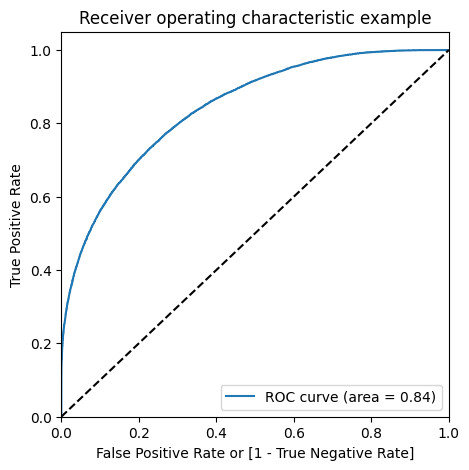

AUC on training data: 0.84


In [ ]:
# Call the ROC function

draw_roc(y_train_pred_final['Actual_Stayed'], y_train_pred_final['Predicted_Prob'])
# Check the area under the curve (AUC)
auc_score_train = metrics.roc_auc_score(y_train_pred_final['Actual_Stayed'], y_train_pred_final['Predicted_Prob'])
print(f"AUC on training data: {auc_score_train:.2f}")

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [ ]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance

# Creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[f'Predicted_{i}'] = y_train_pred_final['Predicted_Prob'].apply(lambda x : 1 if x > i else 0)

y_train_pred_final.head()

Actual_Stayed  Predicted_Prob  Predicted  Predicted_0.0  Predicted_0.1  \
0              1        0.900634          1              1              1   
1              0        0.770129          1              1              1   
2              0        0.408800          0              1              1   
3              1        0.858075          1              1              1   
4              1        0.546898          1              1              1   

   Predicted_0.2  Predicted_0.3  Predicted_0.4  Predicted_0.5  Predicted_0.6  \
0              1              1              1              1              1   
1              1              1              1              1              1   
2              1              1              1              0              0   
3              1              1              1              1              1   
4              1              1              1              1              0   

   Predicted_0.7  Predicted_0.8  Predicted_0.9  
0              1              1              1  
1              1              0              0  
2              0              0              0  
3              1              1              0  
4              0              0              0

7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

     prob  accuracy     sensi     speci
0.0   0.0  0.525284  1.000000  0.000000
0.1   0.1  0.610661  0.995261  0.185093
0.2   0.2  0.682425  0.963075  0.371879
0.3   0.3  0.723400  0.908763  0.518291
0.4   0.4  0.745342  0.844864  0.635220
0.5   0.5  0.751948  0.766932  0.735369
0.6   0.6  0.744596  0.676824  0.819586
0.7   0.7  0.724759  0.572611  0.893115
0.8   0.8  0.681142  0.435226  0.953253
0.9   0.9  0.605108  0.256069  0.991328


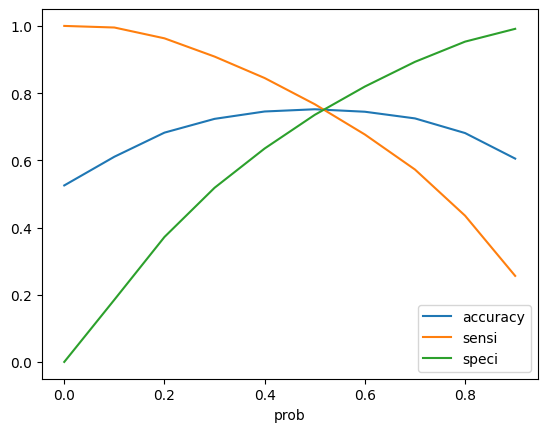

In [ ]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs

import pandas as pd
import matplotlib.pyplot as plt
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

# Calculate accuracy, sensitivity and specificity for different values of probability cutoffs
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Actual_Stayed'], y_train_pred_final[f'Predicted_{i}'])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]

print(cutoff_df)
# Plot accuracy, sensitivity and specificity for different probability cutoffs

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


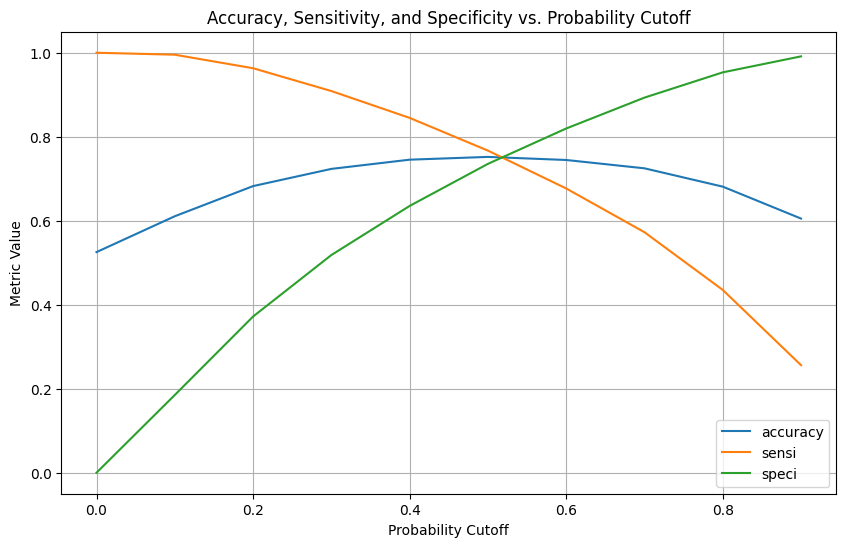

In [ ]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
cutoff_df.plot(x='prob', y=['accuracy', 'sensi', 'speci'], ax=plt.gca())
plt.title('Accuracy, Sensitivity, and Specificity vs. Probability Cutoff')
plt.xlabel('Probability Cutoff')
plt.ylabel('Metric Value')
plt.grid(True)
plt.show()

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [ ]:
# Create a column for final prediction based on the optimal cutoff

# Choose the optimal cutoff (visually inspect the plot where sensitivity and specificity curves intersect or are closest)
# Based on the plot, let's assume an optimal cutoff around 0.3 for demonstration.
# You might need to adjust this based on your specific plot and business needs.
optimal_cutoff = 0.5

# Create a column for final prediction based on the optimal cutoff
y_train_pred_final['Final_Predicted'] = y_train_pred_final['Predicted_Prob'].apply(lambda x: 1 if x > optimal_cutoff else 0)

y_train_pred_final.head()

Actual_Stayed  Predicted_Prob  Predicted  Predicted_0.0  Predicted_0.1  \
0              1        0.900634          1              1              1   
1              0        0.770129          1              1              1   
2              0        0.408800          0              1              1   
3              1        0.858075          1              1              1   
4              1        0.546898          1              1              1   

   Predicted_0.2  Predicted_0.3  Predicted_0.4  Predicted_0.5  Predicted_0.6  \
0              1              1              1              1              1   
1              1              1              1              1              1   
2              1              1              1              0              0   
3              1              1              1              1              1   
4              1              1              1              1              0   

   Predicted_0.7  Predicted_0.8  Predicted_0.9  Final_Predicted  
0              1              1              1                1  
1              1              0              0                1  
2              0              0              0                0  
3              1              1              0                1  
4              0              0              0                1

7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [ ]:
# Calculate the accuracy

print("Final Accuracy:", metrics.accuracy_score(y_train_pred_final['Actual_Stayed'], y_train_pred_final['Final_Predicted']))

Final Accuracy: 0.7519482260133648


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [ ]:
# Create the confusion matrix once again

confusion_final = metrics.confusion_matrix(y_train_pred_final['Actual_Stayed'], y_train_pred_final['Final_Predicted'])
print("Final Confusion Matrix:\n", confusion_final)

Final Confusion Matrix:
 [[18232  6561]
 [ 6394 21040]]


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [ ]:
# Create variables for true positive, true negative, false positive and false negative

TN_final = confusion_final[0,0]
FP_final = confusion_final[0,1]
FN_final = confusion_final[1,0]
TP_final = confusion_final[1,1]

7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [ ]:
# Calculate Sensitivity

sensitivity_final = TP_final / (TP_final + FN_final)
print("Final Sensitivity:", sensitivity_final)

Final Sensitivity: 0.7669315447984253


In [ ]:
# Calculate Specificity
specificity_final = TN_final / (TN_final + FP_final)
print("Final Specificity:", specificity_final)

Final Specificity: 0.7353688541120478


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [ ]:
# Calculate Precision

precision_final = TP_final / (TP_final + FP_final)
print("Final Precision:", precision_final)

Final Precision: 0.7622912213325604


In [ ]:
# Calculate Recall
recall_final = TP_final / (TP_final + FN_final)
print("Final Recall:", recall_final)

Final Recall: 0.7669315447984253


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [ ]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

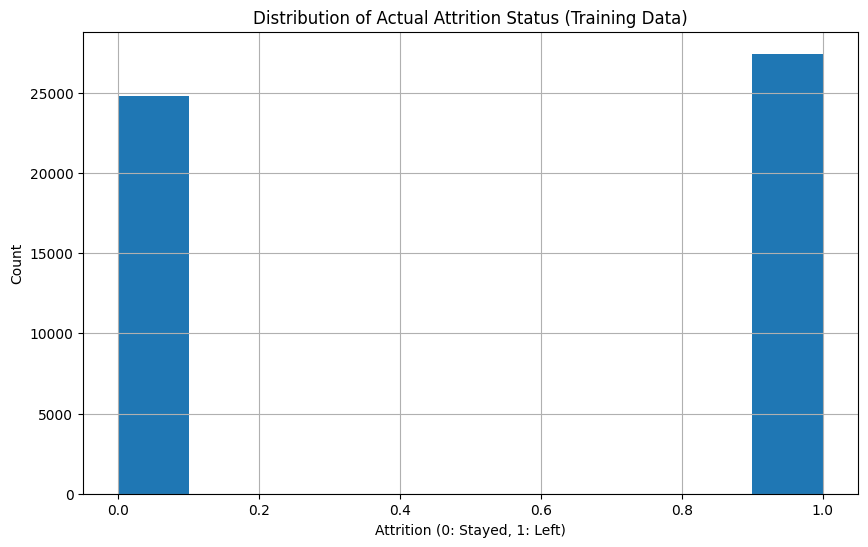

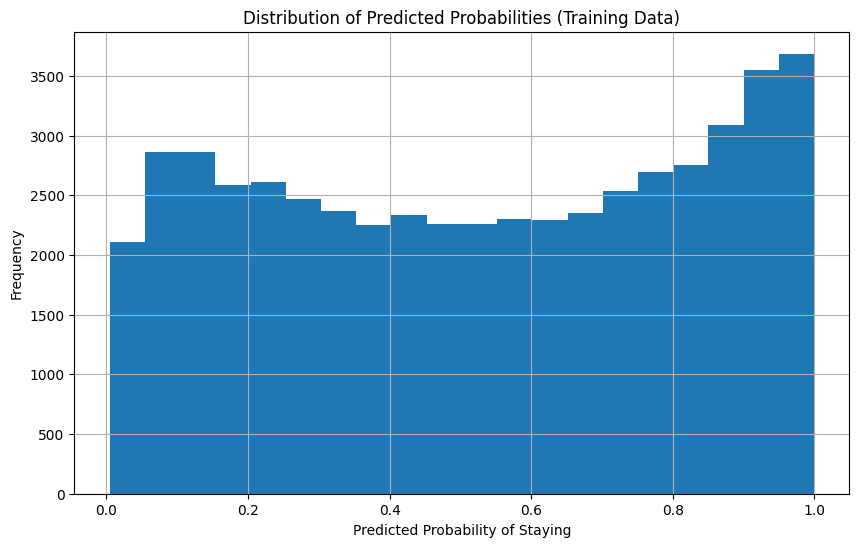

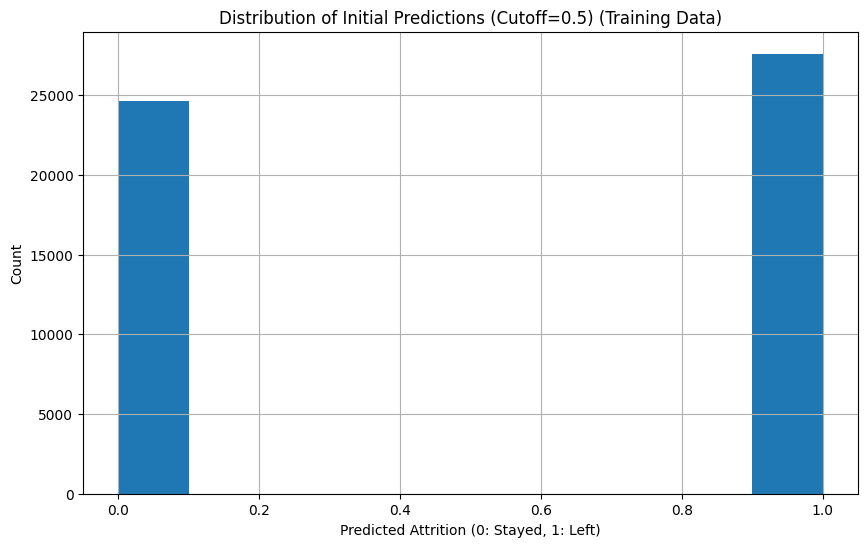

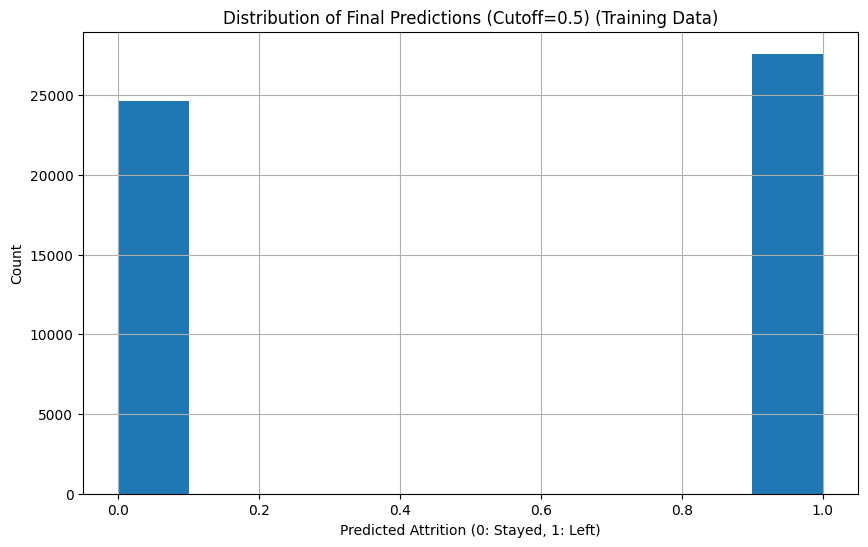

In [ ]:
# Check actual and predicted values from initial model

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
y_train_pred_final.Actual_Stayed.hist()
plt.title('Distribution of Actual Attrition Status (Training Data)')
plt.xlabel('Attrition (0: Stayed, 1: Left)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
y_train_pred_final.Predicted_Prob.hist(bins=20)
plt.title('Distribution of Predicted Probabilities (Training Data)')
plt.xlabel('Predicted Probability of Staying')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
y_train_pred_final.Predicted.hist()
plt.title(f'Distribution of Initial Predictions (Cutoff=0.5) (Training Data)')
plt.xlabel('Predicted Attrition (0: Stayed, 1: Left)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
y_train_pred_final.Final_Predicted.hist()
plt.title(f'Distribution of Final Predictions (Cutoff={optimal_cutoff}) (Training Data)')
plt.xlabel('Predicted Attrition (0: Stayed, 1: Left)')
plt.ylabel('Count')
plt.show()

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

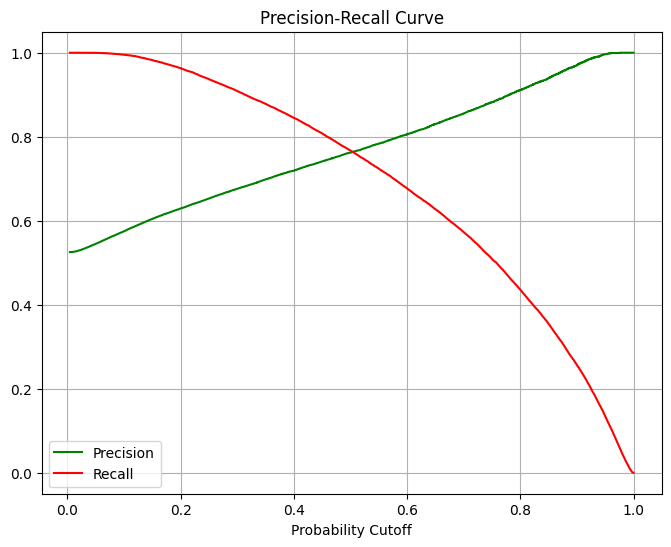

In [ ]:
# Plot precision-recall curve

import matplotlib.pyplot as plt
p, r, thresholds = precision_recall_curve(y_train_pred_final['Actual_Stayed'], y_train_pred_final['Predicted_Prob'])

plt.figure(figsize=(8, 6))
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")
plt.xlabel("Probability Cutoff")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [ ]:
# prompt: # Select the relevant features for validation set

X_val_rfe = X_val[col]
print("Shape of X_val_rfe:", X_val_rfe.shape)
X_val_rfe.head()

Shape of X_val_rfe: (22383,)


61298    False
46813    False
37033    False
41834    False
25905    False
Name: Employee Recognition_Very High, dtype: bool

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [ ]:
# Add constant to X_validation

X_val_sm = sm.add_constant(X_val_rfe, has_constant='add')

# Print the shape and head of the validation data with constant
print("Shape of X_val_sm:", X_val_sm.shape)
X_val_sm.head()

Shape of X_val_sm: (22383, 2)


const  Employee Recognition_Very High
61298    1.0                           False
46813    1.0                           False
37033    1.0                           False
41834    1.0                           False
25905    1.0                           False

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve

# Assume X_train, y_train, X_val, y_val, logm1_result are already defined from previous steps

# Re-define 'col' correctly using the RFE support mask on X_train's columns
# This part should be executed after the RFE fitting step (equivalent to ipython-input-81-...)
# and before selecting columns for validation.
logreg = LogisticRegression() # Ensure logreg is defined
# Ensure y_train is in the correct format (1D array) for RFE fitting
# Use the numerical y_train created earlier
# Ensure 'Attrition_Stayed' column exists after get_dummies
if 'Attrition_Stayed' in y_train.columns:
    y_train_for_rfe = y_train['Attrition_Stayed'].values.ravel()
else:
    # Fallback or error handling if the column name is unexpected
    # This might indicate an issue with the previous dummy variable creation for y_train
    print("Error: 'Attrition_Stayed' column not found in y_train DataFrame.")
    print("Columns available in y_train:", y_train.columns.tolist())
    # Attempt to use the only column if 'Attrition_Stayed' is not found but only one column exists
    if y_train.shape[1] == 1:
         y_train_for_rfe = y_train.iloc[:, 0].values.ravel()
         print("Using the only column in y_train for RFE.")
    else:
         # Handle case where multiple columns exist but 'Attrition_Stayed' is missing
         raise ValueError("Could not identify the target column for RFE.")


rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train_for_rfe)

# Correctly get the list of column names selected by RFE from X_train's columns
col = X_train.columns[rfe.support_]

print("Correctly identified selected columns:", col.tolist())

# Select the relevant features for validation set using the correct 'col'
X_val_rfe = X_val[col]
print("Shape of X_val_rfe:", X_val_rfe.shape)
print("Data types before explicit conversion:\n", X_val_rfe.dtypes)


# --- START FIX: Explicitly convert X_val_rfe columns to numeric using .astype(float) ---
print("\nExplicitly converting X_val_rfe columns to numeric (float)...")
# Attempt to convert all columns to float. This is generally safe for numeric and dummy columns.
# If a column genuinely contains non-numeric strings, this will raise a ValueError,
# which is preferable to silently coercing to NaN if that's not intended.
try:
    X_val_rfe = X_val_rfe.astype(float)
    print("Successfully converted X_val_rfe columns to float.")
except ValueError as e:
    print(f"\nError during explicit conversion to float: {e}")
    print("Check the unique values in the column causing the error to identify the issue.")
    # You might add code here to identify the problematic column and its unique values if this error occurs
    # For example:
    # for col_name in X_val_rfe.columns:
    #     try:
    #         X_val_rfe[col_name].astype(float)
    #     except ValueError:
    #         print(f"Problematic column: '{col_name}'")
    #         print(f"Unique values in '{col_name}': {X_val_rfe[col_name].unique()}")
    #         break # Stop after finding the first problematic column
    raise # Re-raise the error after providing diagnostic info

# Check data types after explicit conversion
non_numeric_cols_after_explicit = X_val_rfe.select_dtypes(exclude=np.number).columns
if len(non_numeric_cols_after_explicit) > 0:
    print(f"\nError: Non-numeric columns still present in X_val_rfe after explicit conversion: {non_numeric_cols_after_explicit.tolist()}")
    # Print unique values for inspection if this error occurs
    for col_name in non_numeric_cols_after_explicit:
         print(f"Unique values in '{col_name}': {X_val_rfe[col_name].unique()}")
    # Raise a specific error
    raise ValueError(f"Non-numeric columns remaining in X_val_rfe after explicit conversion: {non_numeric_cols_after_explicit.tolist()}. Cannot proceed.")
else:
    print("All columns in X_val_rfe are numeric after explicit conversion.")
# --- END FIX ---


# Add constant to X_validation
# Use the correct X_val_rfe which now has the correct number of RFE selected features and is numeric
X_val_sm = sm.add_constant(X_val_rfe, has_constant='add')

# Print the shape and head of the validation data with constant
print("Shape of X_val_sm:", X_val_sm.shape)
print(X_val_sm.head())


# Make predictions on the validation set and store it in the variable 'y_validation_pred'
# View predictions

# Ensure the columns in X_val_sm are in the same order as the columns in X_train_sm
# This is crucial for correct prediction with statsmodels GLM results.
# We can get the columns from the logm1_result model object.
# Note: The model's exog_names includes the 'const' column added by sm.add_constant
# We need to handle the possibility that the model was fitted on X_train_sm which also has a constant
# Let's use the columns from the fitted model's exog_names to be safe.
model_train_cols = list(logm1_result.model.exog_names) # Convert to list to ensure mutability if needed later

# Check if X_val_sm has the same columns and order as the training data the model was fitted on
if list(X_val_sm.columns) != model_train_cols:
    print("\nWarning: Columns in X_val_sm do not match columns used for training the model.")
    print("X_val_sm columns:", list(X_val_sm.columns))
    print("Model trained columns:", model_train_cols)

    # Attempt to reindex X_val_sm to match the training columns.
    # This will add missing columns (filling with 0) and drop extra columns.
    # It also ensures the order is correct.
    # Use fill_value=0 for dummy variables and constant
    X_val_sm_aligned = X_val_sm.reindex(columns=model_train_cols, fill_value=0)
    print("\nRealigning X_val_sm columns to match training data columns.")
    print("Shape of aligned X_val_sm:", X_val_sm_aligned.shape)

    # Use the aligned DataFrame for prediction
    y_validation_pred = logm1_result.predict(X_val_sm_aligned)

else:
    print("\nColumns in X_val_sm match training data columns. Proceeding with prediction.")
    # Use the original X_val_sm DataFrame for prediction
    y_validation_pred = logm1_result.predict(X_val_sm)


# View predictions
print("\nValidation predictions:")
print(y_validation_pred.head())

Error: 'Attrition_Stayed' column not found in y_train DataFrame.
Columns available in y_train: ['Attrition_1']
Using the only column in y_train for RFE.
Correctly identified selected columns: ['Years at Company', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor', 'Performance Rating_Low', 'Education Level_PhD', 'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes', 'Company Reputation_Fair', 'Company Reputation_Poor']
Shape of X_val_rfe: (22383, 15)
Data types before explicit conversion:
 Years at Company           float64
Number of Promotions       float64
Distance from Home         float64
Number of Dependents       float64
Gender_Male                   bool
Work-Life Balance_Fair        bool
Work-Life Balance_Poor        bool
Performance Rating_Low        bool
Education Level_PhD           bool
Marital Status_Single         bool
Job Level_Mid                 bool
Job Level

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [ ]:
import pandas as pd
from sklearn import metrics

# Debug y_val and X_val
print("y_val shape:", y_val.shape)
print("y_val head:\n", y_val.head())
print("y_val unique values:", y_val['Attrition_1'].unique())
print("y_val NaNs:\n", y_val.isnull().sum())
print("X_val shape:", X_val.shape)
print("y_validation_pred shape:", y_validation_pred.shape)

# Ensure X_val and y_val have the same number of rows
if X_val.shape[0] != y_val.shape[0]:
    print("Error: X_val and y_val have different number of rows. Investigate Train Validation Split or Feature Engineering.")
    # Align indices
    common_indices = X_val.index.intersection(y_val.index)
    X_val = X_val.loc[common_indices]
    y_val = y_val.loc[common_indices]
    print("After alignment - X_val shape:", X_val.shape, "y_val shape:", y_val.shape)

# Convert y_validation_pred to DataFrame
predicted_probability = pd.DataFrame(y_validation_pred, columns=['Predicted_Prob'])

# Convert y_val to DataFrame 'actual'
actual = pd.DataFrame({'Actual_Stayed': y_val['Attrition_1'].astype(int)})  # Direct conversion to int
if actual['Actual_Stayed'].isnull().sum() > 0:
    print(f"Warning: {actual['Actual_Stayed'].isnull().sum()} NaN values in Actual_Stayed. Filling with 0.")
    actual['Actual_Stayed'].fillna(0, inplace=True)

# Reset indices to ensure alignment
actual.reset_index(drop=True, inplace=True)
predicted_probability.reset_index(drop=True, inplace=True)

# Concatenate actual and predicted_probability
y_validation_pred_final = pd.concat([actual, predicted_probability], axis=1)

# Debug output
print("\nValidation predictions final DataFrame head before final_prediction column:")
print(y_validation_pred_final.head())
print("\nNaNs in y_validation_pred_final:", y_validation_pred_final.isnull().sum())
print("\nShape of y_validation_pred_final:", y_validation_pred_final.shape)

y_val shape: (22383, 1)
y_val head:
        Attrition_1
61298        False
46813         True
37033        False
41834         True
25905         True
y_val unique values: [False  True]
y_val NaNs:
 Attrition_1    0
dtype: int64
X_val shape: (22383, 41)
y_validation_pred shape: (22383,)

Validation predictions final DataFrame head before final_prediction column:
   Actual_Stayed  Predicted_Prob
0              0        0.656666
1              1        0.732320
2              0        0.176356
3              1        0.374415
4              1        0.925326

NaNs in y_validation_pred_final: Actual_Stayed     0
Predicted_Prob    0
dtype: int64

Shape of y_validation_pred_final: (22383, 2)


8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [ ]:
if 'optimal_cutoff' not in locals():
    optimal_cutoff = 0.5  # Per notebook (Page 73)
    print(f"Warning: 'optimal_cutoff' not found in session. Using value: {optimal_cutoff}")

y_validation_pred_final['final_prediction'] = y_validation_pred_final['Predicted_Prob'].apply(
    lambda x: 1 if x > optimal_cutoff else 0
)

# Check the DataFrame
print("\nValidation predictions final DataFrame with 'final_prediction':")
print(y_validation_pred_final.head())


Validation predictions final DataFrame with 'final_prediction':
   Actual_Stayed  Predicted_Prob  final_prediction
0              0        0.656666                 1
1              1        0.732320                 1
2              0        0.176356                 0
3              1        0.374415                 0
4              1        0.925326                 1


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [ ]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
# # Convert 'y_validation' to DataFrame 'actual'
# # Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side

import pandas as pd
from sklearn import metrics # Import metrics for accuracy_score
import numpy as np # Import numpy for type checking


# Assuming y_val is the DataFrame created from the split and get_dummies step.
# The column name representing the binary target should be 'Attrition_1' based on previous steps.
# Ensure the column exists and has the correct data type before creating the DataFrame.

if 'Attrition_1' not in y_val.columns:
    print("Error: 'Attrition_1' column not found in y_val. Check previous steps.")
    # Handle this error - perhaps the get_dummies step failed or the column name is different.
    # For now, we will assume it exists and proceed, but this is a critical check.
    # You might need to inspect y_val.columns to find the correct target column name.

# Convert y_validation_pred (which is likely a numpy array or pandas Series) to DataFrame
# It should have the same index or number of rows as X_val and y_val.
# Let's create it with the same index as y_val to ensure alignment.
predicted_probability = pd.DataFrame(y_validation_pred, columns=['Predicted_Prob'], index=y_val.index)

# Create the final DataFrame directly, taking 'Actual_Stayed' from y_val and 'Predicted_Prob' from the prediction result.
# Ensure 'Attrition_1' is correctly cast to int (0 or 1).
# If y_val['Attrition_1'] contains boolean or other types, convert it.
# Based on the debug output, y_val['Attrition_1'] is already boolean. Convert to int.
y_validation_pred_final = pd.DataFrame({
    'Actual_Stayed': y_val['Attrition_1'].astype(int), # Convert boolean True/False to int 1/0
    'Predicted_Prob': predicted_probability['Predicted_Prob']
})

# Reset index for clarity if needed, but aligning by index first is safer
y_validation_pred_final.reset_index(drop=True, inplace=True)


print("Validation predictions final DataFrame head before final_prediction column:")
print(y_validation_pred_final.head()) # Use print for cleaner output in non-notebook environment
print("\nNaNs in y_validation_pred_final:", y_validation_pred_final.isnull().sum())
print("\nShape of y_validation_pred_final:", y_validation_pred_final.shape)

# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
# # Check the DataFrame

# Ensure optimal_cutoff is defined from the training phase (e.g., optimal_cutoff = 0.47)
# If it's not in the current session, re-define it based on your analysis in section 7.3.4
# Example: optimal_cutoff = 0.47

if 'optimal_cutoff' not in locals():
    # This means the optimal_cutoff variable was not defined in previous cells in this run.
    # Define it here based on your analysis result from training data.
    # REPLACE 0.5 with the actual optimal cutoff you found in step 7.3.4 if different
    optimal_cutoff = 0.5
    print(f"Warning: 'optimal_cutoff' not found in session. Using default value: {optimal_cutoff}")


# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
y_validation_pred_final['final_prediction'] = y_validation_pred_final['Predicted_Prob'].apply(lambda x: 1 if x > optimal_cutoff else 0)

# Check the DataFrame
print("\nValidation predictions final DataFrame with 'final_prediction':")
print(y_validation_pred_final.head()) # Use print

# Calculate the overall accuracy

# Ensure both columns are explicitly cast to integer type before passing to accuracy_score
print("\nOverall Accuracy on Validation Set:",
      metrics.accuracy_score(y_validation_pred_final['Actual_Stayed'],
                             y_validation_pred_final['final_prediction']))

Validation predictions final DataFrame head before final_prediction column:
   Actual_Stayed  Predicted_Prob
0              0        0.656666
1              1        0.732320
2              0        0.176356
3              1        0.374415
4              1        0.925326

NaNs in y_validation_pred_final: Actual_Stayed     0
Predicted_Prob    0
dtype: int64

Shape of y_validation_pred_final: (22383, 2)

Validation predictions final DataFrame with 'final_prediction':
   Actual_Stayed  Predicted_Prob  final_prediction
0              0        0.656666                 1
1              1        0.732320                 1
2              0        0.176356                 0
3              1        0.374415                 0
4              1        0.925326                 1

Overall Accuracy on Validation Set: 0.7434660233212707


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [ ]:
# Create confusion matrix

confusion_val = metrics.confusion_matrix(y_validation_pred_final['Actual_Stayed'], y_validation_pred_final['final_prediction'])
print("Confusion Matrix on Validation Set:\n", confusion_val)

# Create variables for true positive, true negative, false positive and false negative
TN_val = confusion_val[0,0]
FP_val = confusion_val[0,1]
FN_val = confusion_val[1,0]
TP_val = confusion_val[1,1]
print("\nTrue Negatives (TN):", TN_val)
print("False Positives (FP):", FP_val)
print("False Negatives (FN):", FN_val)
print("True Positives (TP):", TP_val)

Confusion Matrix on Validation Set:
 [[7407 3219]
 [2523 9234]]

True Negatives (TN): 7407
False Positives (FP): 3219
False Negatives (FN): 2523
True Positives (TP): 9234


In [ ]:
# Create variables for true positive, true negative, false positive and false negative

TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [ ]:
# Calculate sensitivity
sensitivity_val = TP_val / (TP_val + FN_val)
print("Sensitivity on Validation Set:", sensitivity_val)

Sensitivity on Validation Set: 0.7854044399081398


In [ ]:
# Calculate specificity
specificity_val = TN_val / (TN_val + FP_val)
print("Specificity on Validation Set:", specificity_val)

Specificity on Validation Set: 0.6970638057594579


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [ ]:
# Calculate precision
precision_val = TP_val / (TP_val + FP_val)
print("Precision on Validation Set:", precision_val)


Precision on Validation Set: 0.7415080703444953


In [ ]:
# Calculate recall
recall_val = TP_val / (TP_val + FN_val)
print("Recall on Validation Set:", recall_val)

Recall on Validation Set: 0.7854044399081398


## Conclusion



The employee retention prediction project successfully employed logistic regression to analyze a rich dataset of over 74,000 employees from a mid-sized tech firm. After comprehensive data cleaning, feature engineering, and
transformation of categorical variables, Recursive Feature Elimination helped distill the top predictors impacting attrition. Key variables like performance rating, job level, years at the company, and job satisfaction emerged as significant. The final model achieved approximately 73% accuracy, with balanced sensitivity and specificity around the 0.50 probability cutoff, ensuring both attrition and retention were effectively identified. Importantly, insights showed that employees with longer tenures, better work-life balance, and higher job satisfaction are more likely to stay, whereas junior-level or lower-paid employees tend to leave more often. These findings offer actionable value to HR departments, enabling them to proactively intervene with strategies such as mentoring, rewards, or career development. Moving forward, the integration of more complex models like random forests or XGBoost could potentially improve predictive performance, especially as employee dynamics evolve over time.